# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

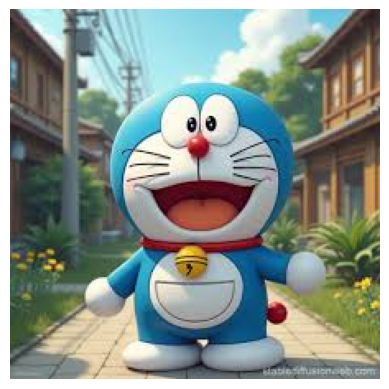

In [1]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

# PASTE BASE64 STRING HERE
base64_image="""/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUTEhMWFhUXFRcXFxgXGBUVFxUWFRUXFxUYFRcYHSggGBslHRUVITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OGxAQGzAlICYtLS0tMi0tLy8tLS0tLS0tLS0vLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQMGAAIHAQj/xABFEAACAAQDBAcEBwUGBwEAAAABAgADBBEFEiExQVFhBhMiMnGBkUJyobEUI1KCksHRBzNisvAVU2OiwuEWJENzk9Li8f/EABoBAAIDAQEAAAAAAAAAAAAAAAMEAQIFAAb/xAAvEQACAgEEAQMDAwMFAQAAAAAAAQIRAwQSITFRE0FhBRQiMnGhgbHwQpHB0fEV/9oADAMBAAIRAxEAPwCsYFi7yJizZZNt4/UR27AcYl1MsPLN+I2EGPnWQ+T9ItnQ7pI1JNVwSZTHtrt0iYyrgrmwrIrXZ251B2iNWXS0b0tXLny1myjdWF9PzjHFoMnZnTg4ujkXSx1lzmlL3LkroeyTtENaSiqHlS5qVIsLAWTZy2wp6X4g0ya2aSUsTa51Nt9oY0nSkrKEvqQBYb9/GKYxvJdKg5DO66WHn9Ydcy5bWuNhMPsDfsvL+yTbwMIaWahIqDmBFrgbM2wEw7ZOqqEcdyaLHk20QVC0/AQy/V80b84mbvA8RGzJ2mH2h8YiQ9gcjaLAWTMIjIiciNCIumCZARGhETkRoVi1lWiAiNSImIjUiJsq0QFY3p5BdgvExsVhv0eAu3GIyT2xbL4se+aixjRYcksaDXeTBYUDZGk17RA1RGa90uWbSUYKkRVlRaFk17wTPBMCsINBJAZuwOt7sLckOHZdhjeomS2GVQBaGIZVHgTy6dze6xJlhdjWJpTpmOrHurvPODMbrkpkLufAbyeEcxxfEmdzNmHU91eAiM+eltiW0ejcnun0iLEa9iTMmHMx2DhCOZMZmuYmaazE33xIlP2gOIhHrs2fhA/VxkNvoUZEbjqBqmmtA1PNKniN4hxNUqcrjbs84Bm02hPOJTrhkfKLd0H6WNRuATeSx7Q+zzEdqp56TkDqbgi4Ij5glTSh5b4vvQPpcadhLmG8ljofsE/lF0wOSFoY/tDUdYf63RXFiwdOZgdyym4OoMe/8A1TqryZqhGUHtXuCRrFsb4BzQz6KEd1hdWsDfjaH+I09kKj3kPAjW0LcCwSbKlOk1lLgggrfdsh/TsJkvXwPIiDiU3zYJT1XWIszeO8OG4xJl1cce0IDlU5lTGXc2o5jfBMqaDlN9nZPhuiUUa8BKbBHhEbShpbnGxEWsE0QFY1KxORGhETZVogKxrlicrGJLuQOMWsigcrBNBOKNoL33Q5l4egFiLmN6SkVL23wvLPFpobhpZqSdmz6i8RSZVzrBTmI3mADSFkx+vIPXTVAis12LooOU3MZ0rr2VbAbd8Uqa+ZgGO06gQHJmlF7IlHyM8RxbNrfwgKmxVlBmMSqjefa5CPa2ip5C55nkua5PlFQxrFy5u2gHcQbAOcVji/Lc3bCRx32b47i7TnMxz7i8BFcmMzG5jcsXNzBkulsFJ4wfoP8I1paS8Ma2laWyaalBbzgqlo2YEgWUAnxtBnSBfrJP8A2xAHk/JIMsfFsU/R5nGMiy9SIyGvRXkU+5fgWdIyCJOljpeAklXDe8Y1xCtaYUDeybDwgqlHe94xGZ3I7AqhQjrKYWuIFluUNt0NEl9pxzHziKvpNpEVTrgKy3Yn+7le4PlHV8Dm/wDLyvcX5RyrEx2JXuj5RP0e6Uz1mLT3upcAcheLY/0oXyJuTOn1K2ObyPhC5D1c0j2X+Bh1kBGvCFtVIzLY7VhhMRlGhZiyzXz5MvY1G2+yFeGNNanDdiwPO+2HFTT51OZmVlU7DbMNx5wu6NUIVVLOSGFwCdL79I73LKtg+pzfzAMS2iGm4eUFERexeS5IrR4ViRtIk+nSVFjcnkP1jm37IhKPu6BcsEUEsFtRENRi0o7FPwj2lxyUosVbx0/WOkpuPR0J4lPmSHoEB4jikuSO2bHcOMDTukErKSpJP2bEGKP0lxcTWuVtYWtvjPzOUPbk045YS/S0yxHpdKN7i0G0+JJMTOpuI5VMlltV2byTBuC4i63TNYcNxiscrirfJRu2WrpFUI6izaxThTC7E32bbwTUVZsSNmsJp2IEggaXgFzyS3dE8ICrJRLGzX4FiTaIKjAiBmaYCeQg6XSPN1XU8N8aUsomassnfb4Q24ySuy8csm0hVQUo2njYQ7xCjAp5bW1LGDOimDibOcHXKT8I2x1bSEHCY3zMLZJ21RowilZY5OHKtA77ypirY+PrJP8A2xFnVWeiYlrKqkBRv5mK7i8vNNkj/DEUbe9N+CYJU68kX0hoyDP7OHE+kZDn3WPyKfaZPBWHXNYg31Hj5wfR+17xiKaiTGLyRk12D9N8R0tWQDmFtbX5xzTJTT6IZQ7T+I+cGzkUq3EQKiWLHjb5wxnoMt+UdZzQ2xcdmX7o+UWGTVoJMsIi5wou1he8V7GG0TQ90fKI5TNbQ7oim8api+V/kOmx+apILw7wHHQ4vMYXGniIoefXWCiyAWW4MWScOhd89nRMQRTLbXcSp/KEOFUwaSDaxGoNzx10gxqK1IodrsBcaxJ0ZoAkpZkwdphcDXYdl+UMJ8kcKH9RvIkXs2xSBr+g3xtPngbIFq8QgOkvOmrLB26k8FG0/IeJEGUHW6XQnPKnJQh2wmWk2cSJa3A0LE5VB4X3nkAbb7RFX4TUIpbKrgakISW8lKi/lryi2ypaqoVQAALADcI9cwv91JPgb/8An45RqV35OZiqvs1va1rm99lgNpPCHkjoxPZbs6SyfZILke8QQAfC/jEmGYWBiM027CKJqjcGmkgfFJp9IthMHz6tqlAV0n0yPLy880v+znOMUE6n1mAFCbB1JK3OwNfVSfTnCqbUhhZgGHA6x0+vlq6MjgFWBDA7CDtjjdaDKmzJRNyjFb8V2ofNSIY0ub1k4z7F9do/Qanj6/sSTaZPYOXkTceR3ecT09Ci2Ive2t+MK3qI8l1pGl9PlA9Xod8H6XDJ0utadZOQurkljYEBRCKrlhTYG8bVDm8D7YzMeJw4Zq2nybyKlkN1NjsgzCCTOS/H8jAOTTWDsIb61PH8ovkf4stj/Wv3H3RCaVnTcouSWA+MCY4CZKDf1jfMxP0fmdW8yZ/Ew12b40qqwWRUTOS5yk93MdTGe3yqNlLuxqtZlpjK0AIN2OgF4T1eIdtElS7zCtlZtBYbxB0jBC5vPbMfsjRR5R7ikyRJdZjt2gpVABmA8Y6H5y8kSkoLgF+hV3219IyFn/Fj/wB0vq36xkG9D5/hAvWl4KzT1QvdGseENZFeraTFCniNkVjqdp4RKlSw0Oo5w4LOmWSfTle1LNwSNNoiX6Ve6tofn4Qlo8QI7rfdMNkq5czRuy3PZEON9Hbmuyw4x7HgPlGlPUU5srkow0vuMb4uO54D5QjqcRVSVMkNbffbFVexFdqlNplomYepX6sBuYIvCWe5vY7tITzMTIHYQpzDGC6KqEyw9r+b/eLY1QLLirou3RTNMBaYSZcvQA7GY7F8BtPlxh3WV14CVBJlpKHsjtc3OrH1+AEAzp0aODAlyYOq1LbpdEs6ph50H1mTm3hUA+8XJ/kEV3DMPn1X7hRkvYznuJfPIBrMPhYc4uOAYH9DJLTWmGbYMSFVQVuVCKNgOZtpO6I1eWCg4J8hvp2myvKsslwWCOeftU6V1FKZVPS5hNnSpzqy9VcGSFYX60FcuXrCRtNlA2xf2eKd096PUdcksVGbNLY5Glmz9q2ZNhuDYbr6aWjLi1ds9AouXCBsE6STGoplZlHXf2fLnFQNC6LVNoOBKk24GKz+zHpXVTsRaXMmM8iokNUIjzevMkqwXvf9O5D9iwAzLpD3CcRk09SZbDqpfVpJVGFgqygRLDA+841+0IaYD0doKJ5kymlZHmaE5may3vlTMTlW+4cBwESpRldBMuCeKt6osNZNsI5H03cLVknQGWlydl7uLX2XsFjo9bWAgm9gNSd1oX0CZgzMO+b2I9mwC3B5AG3Mw1p5+k9xnanGs0dpy4tGhaL1jnRCW4LU4Ep9uXZLfkVHcPMeYMUKpuhKzBkZTZg1hY/Lz3xrY88ciMXLpZ435CKfKxCtv0HnDYUglqVCZjxiuJMB1BBHEaw6lV7ZM1/94yvqeJ8Tj17j2iycODBKwN7QsI9wiYBMGl29nhfnGwE2ceypb5esMKPCFkMJtTMC21CjUnxhOvwpmhiT3phWGULT7tNOgYgIui6Hfxg6vlSJWRpjBQhuFG8mElZ0mIBWmQIv2jv12xV6rEASS7GY3jpC8cHNy5+DSlkbXHBZsR6VTHushco474rc6fLQ3mNmbbYa6wvnVrsLd0cBpAvUb4Oo+3QK6G/9ty/7r5RkKuojI7ZEnfIsmHYeGXXfCaqpwGIG4wdJxR5YOgIGkKHq2LEkXuYZm1JcCkE4t2aTZBEbyZrLt1F98E0zA6EEQbKCi4I2wJyrgtKaRaKuoDqjDgPlC2YZZcgmzc9hjyibS26F+J0r9b2CWLHu20AizSiqZVSuVjX+y2YaLf0ifoxLzVEtHUEIS4PDqwWF/MCFtCJ6aXsN+t4snRxQLtvEth6uv+8WxJOSSI1MnHHJvwMsRxAAgG5Zr2AFybbTyA01NhqOIjMIpxPbPOlTzTISGCS2mGY42oeqzHIN9r3Om4iAanMzBU77sET3nYKL8rkE+EdDo8UpKeWsiUzOJYyfUyp1Qcy6NmMlG7V73vvJhzVZXjjUe3/Yx/p2njlk5yXX9wqm6QUd1lidLltYBZb/AFL2GgAlzAreVoZTpSupB1B/oEEb+cIqrpBTsp6yTUFN+ekqbeYaXFeNXhwN5UyqpT/hU9VKTzTqurbzBjLqze6LJUUVWNEaXMXcWJRwP4rAhvEWikftDappZcuazA3ew6sMAjAXF2JuSdddNkdMw8ESkDTDNOUHOyqrPfUEqoABsRuEAdIcPWokvKbYw+I1EVl+S2jGlzejkU6PnWuxeZNJLEknfvvHVOj1LMMiWetYNkGYGzC9ueo8LxXMN6IIKidmH7qaqgHYLypb+erGL1Qy8otBsWPaF+oa+OdKMfY8TDiSDMcvbUDQLfwG3zvGk7GZQYy5d5rjQrLsQp00dyQqHW9ib8AYKr6ZZstke5BtcBmQmxuBmUg2NtRsI2whp5FSAFRaamQaBUvNYDdZrKo/CYMZQwMqfM/eTRLX7EnVvBpzC5+6qkcTFd6XdHpfV9dKS0yWLsSSzTE35mYlmI2gk8Rvh0uHBh9ZOnOf+51Y9JIQHzEe/wBmSlIIzgg/3kwg8QwLEMPGJhJxlaInFTi4s5Ytrk8dvPnFg6P1chEfrgDYgrpcm97geghNiVL1U2ZK3IxA906r/lIiIC422h/U1LC6MzS/jmW79iwYj0rYDLKCyl4+1FXqcSzG+rHi36RBWUtiDqb8Ykl03KMdpI34u+gOe7tqSfDdG0qm4weZAyMfDZHiEW2AeOpiL8Fq8kCSRuBMFTKXsHyjQTRcC5Ou7QQ2nSCZZIGgtf1iknXZKp9Cz6B/FGQ3+iP9k+kZFfU+SdnwV6o2N4iIKcHcIlqH1MQdZaGV0KZX7BpFjr6xN1N9bwu+lMdI3AII10jtoDksNDE8uu6tydIhod0CYg2WYSRpE5oqUaZLHlVV51vYDebCJsCqO+vCWf5lhdR40bBQgtGtBio68qVsWuoI02i4uPECB6S4zSqjsz34ZL4LZ0RUPXyr7JaTJvmoEsfGbfyi/TMfpluomqSNqSwZrD7ksEj0jnXQd1armKwBBpnWxFwQZkrMCDtB0i3Vcx1ssqYkpQui5NCeHAAfnDGs/LLXwR9NhGOnv5YVVY8NCtLPfgWWXKA8pzq/opMRHF69u5SyUX7U2e1/wJL/ADir4t0nelu9Qpts6xRnUX02bVv4HxivYj+0yUe4Jkw+SL6nX4QDal2OxjKX6UdZGLAKvWMpewzZL5c1tct9bX4wDPxtd0cPrunVU/cyyxyGZvVtPhCafjVS/enzT4OVHothHceA60c326O00tapn1V9pmS28jIRfmhg4Vix8+tPYm5dieJY3PDW8bS6qYO7MceDMPkYspsl6BP/AFH0E1WpBGh0Oh2HTYeUVZKOlT97hwSw70tEnJ5Ze3/kjmlN0hq5fdnueTHP/NeHFP8AtAqFHblo/gWT9YneClopx6Ze5NNhzmypT5vssiK/mjAMPSN5lDTA5VUKdn1ZaXY8LyyLGK30dxadiDMGloklLBvbLMdwLaAW5X1GsXKWqooRVAUWsABbTZpFk7F2tkqZROlkjJPAuTeUpuxuTZnXUnboALnXSIMKw9518gHZtck2Ave0FdNHvUKOEpfi7woE+Yq2S9jtsbX4Q5klWBGfCG7UsOxyiyBbMG11I2A8IVK5hjLYmmBP22gjBsOluGaY2UA2jKjJW7NhxqKohpqUtTzXJ7sKqhNR4RaVlKtNPCm4vpCg0itLzE6gaR2KVyl+52SNQQvowOsT3h846DicsCSbADVfmIpFJS2dTf2h84vWK/uT4r8xC2u/VELpKcXRLGRloyM8dOVVQ1MQSyu+CqgbYBe0egiYuRBInAbrxJ9JUkADhAkncNt4lmSsswKeIi1KwFclnooX4jKzTWs1tmkH0UKsT/fMfCJn0cyWlm2NrxNOlWOddtwfMGAafU7DB5Gh8oD1ItjXI26L4jkrVO5gyfiGYfFVi8T6zNHLpoIyuveUg+huIvdDViYiuuxhfwO8eRhnK1Op/wBCmGPp3j/qv2DMRo1qJLyn2MpHhcbo4fVUjSZjynFmRip8th8CLHzjuEuZYxWen3Rg1CipkD61RZ1HtoN44sPj6QJ8j2mybJU+mc1lS2Y2UX+Q8YMTBnO1reAh5hVKoUAQ0WQITnnp0jaWO1yUxsIbMBm28v8AeCBgZ+0fhFr+iiNupEUedkrFEpFRh0xNe8OW30gPU2Ci5JAAG0k6ACLzVywAbwx6H9FQj/S5wsf+kh3H7ZHHgPPwYwzc+xfUSWKNj3oxhIpKVJZ757Tn+JtT6bPKDWaMmzbmFmM1/VSmf2ti82Oz9fKD9ukYrfcpFSxqd1lS5GvayD7vZ+d4Ml0csaNtgTBpGubaRs5njHk2YSxOu2J1M7fpp9C+muL3+Sd0tIA/xG/OGGASc0mYOcATf3A99oa9GP3czxhJe/7mrLpG9XSGVTzVO+xhbToDIbwEWHHVJR1A2qLeMJZEsiSwIsbCIwv8n+5TM1tSBJcqxXxHzi04r+5PivzEJKiUAyAbst/GLLPlyzKLTD2dNBtYg7BAtXLc4tE6SSjGVkcZBF0+x8YyEaHN78HJp2/xiKVTK+max+fhBfUNqcsRllB7S5SN4jf2tGPOd9ECU+R13i+2GEyWrOHO0CBJk3W+2PJc6KNsC22PKNoV4on1zHwiajVyb7BG1YO1xHGLqVqiY8m2HqAY3lyZhJARteRiOmmaiDJFc4PfMSopdsvvro9MsqQGBHjBmFVgkTChP1b6+4x/I/pC2a7s1ySfGJVlljdtm/fpvsN8SpxSoq25STXZdQ0TSJ5Uxz+n6SPKZky5pYY5LkhlW+gJI187Q0kdK0O2W48Mp+RgSmvZmlLQ5o9xH9fgMuaTMkkI51I9ljx5HmIUzcNqE70pjzXtg+FtfhGL0ok/xj7j/kI2bprLXYzfgmH4BYpLHCb5CQyanCqq18og6mZ/dTP/ABv+kTScLqH2SiBxeyj46/CJpfTVCO8fwt+kav0uln2n/A/6RT7fGu2F+51MlxD+GMKPA5csh5zCY41CjuKfD2j4wXPqSxitTelCblmHyA/mIgKf0qPsy/xOB8rwZOMVSF3ptRklck2y1PNG+KnX1H0mZcX6pNAePE+fy8YTYrj02auQsEU7ct7kcCTui1YbP/5eUXUZQu4Cx4Gw47THPKoK12L6nSzglv6/k1RUBzJYDLa0eTJctyEXYPS+8niYVz6ljmdUsoNiQLLBuDhCpcv2hrkNxccb74UqXYtF8k02j7IQa9o7SF9SdkM8JoXRWydWddVD3J890DUtTMmNaWJanaSVvp5wdMq7/VsoZv4FIPkVis4zjwNOTkuAibiEt7pMlsh02XzDnzEA4jKy6A3B2HwhdiNRNU2e7AbNRnA58YGkVdiNbqTv3GApuLsBKbYymNrzO08BwEe4jifZEqWATYeCD9TthJilfYkDaR8z+kZg6TX0lJfW7MdBpsBJ3RGLG3HfIhSp0hn1VT/efERkEf8AM/3kj8SR5FqfwX/H5ENXRdgzOtBGhyg2Ivs8YCanQyi5axF7Cx18+ME0iSSfrSwG635mNcQchTLluWlkjS27aYc3zb2Xzd3VceCv4Vur/wBB6bDpahJkx1ddC0tT2rHnAuLTJPWf8uGC2Gjbm3+UOsBoZZbNNmrK1BVrZr5SNIauZFZMYVMxFEklUZEyCZe2rX3coBPP6eS3bpc/8cVT/wB7CQgpw4pf5/BUaF9eJ5wwexJvofhAbIFmNlHZDEC2ywO0RMWJMPOS28CslROknmInWmPFfWBlETSpZJAUEkmwA1JJ3AQPcQMaLDwxszKPOLBS4DKk2mTSH3om48C/LlviPDsJl0w6yos03asvasvm/wBpuWwc4S4rjjzJoVTcswF/E6w9p9G5PfPrwIajV/6MffkXdJsJHWtMFwswltNgY6kW2CFlHgk2a4SVdm8BYDix3CL5Plgrly5sxChftMxAVRzJIHnFtoei30SUAvaJ1mNvLb/ujYIY1CxRXMVbL/TtVqpL8ZtJfJzaT0KZGQ1FUiS7jNtX7qsW1J2bIu5mUMtAspXsBtEmc4J36hDf1jMbDhQyOUKnUqFLWOmhYHLztrFQxPEJ6zpK55zy3JVj181WDakWs4BAALHTYp4iPJfUse/NsulVqn/2emw58k4bpOzbpJT084dhxLm7r5pZPIhrEiAZXQWpIv16+jn84YVcpmGUTXN9Msy01TfiHF7eBEXOgWygcoa+lRUoNdpdWRqdVlxUoujkWJdH58lss02vsIF1b3W/I2PKA/7O4sflHbK6jSahlzFzKdo+RB3EcY5hjOHNTzWltqNqt9pTsPjtB5iPRaeGGXDirMPVazVrn1HX+39hIlCnD11hjRTZkruMQDtG4+UBVD5decSyamHdkK2tKjNlkyP8rdhUyYzKUuQCc1t14cdG8Imzb2KhRoWNz5KITCoFo6V0dkiXJlrvygn3m1b4kwjqdPiivxQ1pcuWbe7pGU/RsKpyzTc8VBHzgavqPo/ZdOyw7yg9o79RqPCLJ1wtC7Eu2jKDYkGx4HcYz8mCMla7HozaKZiYpWQmUxRxrYkkHiNdkV2tmAd1swIvfYfAjcRDWowwKonTCzDawvZieAMAzsSp/ZpBbm7XhVR+Akk/dBeHYZJ6sVVbMKoTZEXvPb8oKx2oSbLkLQhurJYNLta5W3e5bYrOKzAwllbhLGyk5suuseCvZVyqxVeWh2cYlY3w/wCPYr8Dr6LU/wB0nov6x7CL6dzMZFvTl4RPIwKC4Hxjwyzttpf4xJIYZhqL6ADjBVbKaWihrEFr3BuL3vYxdyimk3ywKi2rBpMq+hNhzBOzdpBE4kywuXNt3bNdt+O6BJVRY336/HbDCViVlAA2RzUfdnIXimb7J9I2FO32T6Q2l4jfQL4w/wCiExZ1XKRhoCWI45BcD1tHfh5LKNk3R39m0yagmVDmUGFwgF3sdma+i+GvlBOKYNKwwgyyzF1Nne11t3gtgANCNdsdDqK9VGpindLpiVUoyj4q29WGwj5eBMF09KabXBGow7sbinTOZYxi5ckA6QB0dGeqB3IrN590fM+kDYlSzJbZHU3vYW1DcMp3+G2LFhHR6dSDPPGV5yghPaRVJtm4E32brRterFtK+zHlgePFJ1/j4Lj0Rkh6yXfYivM8wAi/GZfyi4DpAhF+pqMp2ESXYEcQVvpFM6C1A+lHnJcf55Z/KLfhs60sLvUsn4WK/kIytdzl5+DT+lxS06ryxPi9bTm5Gdb7Q0qao+KxS62nkl86uLgFQSG0BNyALaXsPQR1F6k8T6wlrU1uNhhV44ZFU0P73DmJT6DqVN2e591j8hD2VikvcHPhLmH/AEwVmjC8HhCMFUeEBnNzdshbEtLiTOP3Mv8AMRFe6cSg8mXNA1Vh+GYNnqFh/VzcqMeCk/CEPTB8tKqHaWRfwgn/AEwxhb9RAM0V6b/YoFUlwREmD4BUTpRmSijZWKlScraAEEXFiDfjujJkXX9lsoOaiWeCMOViwPzEM6ycoQ3w7Qpo1Gctkvco1RST5d+slOOdiR6jSOoUVUMotwg/EMLYHQW57j+kIp8soTbzH6RkvXubSyKvn2NKGmWO6HBqoHm1MLusaMmLcWMUy6mMVwy+yhfXOWUqzoBwC6fOKzVrkvlZWBOulrGLlIwlJhtoBa5JNgAIinYRKNxZbcdxPKEMeoSdFtrqyt4X0UqagoVXLLe5DsRYAC+o26nSCeknRhad0SWzTFYZiSBs2WFhqbhvhFjkssrI6ZiUBFicw7QIIVTpACTwzEk7ye1tIN7C3LUREM2eWTdf4pdV/ctJ40qS5Kp1n+D8I8i9/QG+wPVP1jIL90vH8lNj8FJupOlxyOuu6x4RvMckAEt5nTygdOMTIht/W0w02hdHiiDKZAdsEChGUcxry1vEcugmWL2sg2tugW7fwi21obUUkHQLqRDDDJDpPUyQXZb5iO6oIsRfeY1wiknTlyrZJe8k2Z/A7QIvGG06ylCrLCjkRFVH03b5YzCFiJ692PaJvw4RFNmQ8qqRJrXtl4kEa+PGPKfBkOpLW4aCGFnpE+khJ0fw8zKlZhHZl9r71rKPHf5R7+0I2eUf4GHow/WLhJlpLXKoCgeHqYqnT6VmkpM4OR4Bh/8AME02W9RFv/OBfW4k9PJf52U3DMX6iekzcp15qdG+BPmBF+fEwD1ikGW9iSNgYgAN7pFvAjnHIpw7RhzgOONI7DgtK9Sl9thvXl/+Ro6nFv8AyXZn6LJ6a2vo6M1cYieoJhPSzQy5pDqyfZJNhyDC5XwIPlEv0lhtlP8AdyMPKxv8IR6NOrDzMjUvABqm3SpnnlX+ZhGju51Zgi78pu1ubEWXyv4iJsjaTzpmdso7qkF/EaqvjexPIc4qHTLEg8wS1Oku+b3z+g+ZifGOkqIvV09r7Mw7q325b95ufzip3vDumxO9zEtVlVbEb3h30V6QpRTHd/al5RoTrmU7BvsDt0hEIkOBz6hHeQhfqcpdV1az5gCq+1bKb79YvrKeJ2V+m19zG+i7SP2ikzbTEz05NibWdQd+mhtwi24jQG31aZlOu7QHeDHGcEwWpqXEpJbgE2ZmBVEG8sTs8NsfQkmWFRVFrKoUa8BaPPzjFcI9PrVjtONf0KFUU5U3vfjoYGWbfSLviGHo+osrcR+Y3xXa+nQGxWzAd4bG8uMLSxeDOcPAtUi/ziNW1ym1hs4nlGtXmS+ZSviLRqDe3G49NkCSa7BMNopUxldZahj7RI7uulidkQYdOp1LmeMzjuLqey1rnQbQecRdZMAZQxyt3gN9hprtiJwSDc21CnWxf+rx23dabpPx2TuSp+PPQ062n+x/mH6RkV36I/2BGQX7deSnqvwIAIJpKjKQLX1iCXIdtQLDib25wVSZs2WXZm47hGh6W5cg0iwoyrl6xQcwuFBU5rcbGH+D4OZhE2csu3sSwbKo5gbTAvRnBZiHNMlqxJvdr38toEXHIqjuL8IA47HURyC4MBQbl9RETVGa4UADebiIv3h7oC+UFUtODrlsAezz/iMR0XN5EnYSLAagfmYKBPD4x4AP6JjSc1hptOg1O3+tYqSazJhLhbXA1bZ5D+uEAdL5WelfTYVPobfnDOgp2AC3zNvbid5MMp+Fy3QpMuwYWOpX0tqINhtTUvDBZlug4+UfPNdIsbwE8wiOzYr+zaS9+rnTE5NldfkG+Jij4j0DmISOuW44oR8QxjejqMU/cw1ps0OymJXlTcEo3FSVPqIYSuk1QNk3N7wU/G0T1fQ+cPbQ/ihLVdGJq+0PIGKzcH8jGOM170M5nSioPtgeCr+d4V1WJvN77s/InT02RZuiGIU0lGk1NFJnuqky2MtC7NfQOxB0127rb4X0vRN2JOdVuSbBDYXN7DtbBA8c47n+NBMmOVfqsUS1vE4SLRT9Cn3zh/4//uGMnoOntTZh90IvzBhlZoISlhyMopWL/wDsnrJamoVmUE9Va5AvbrL7fEQTJ6IUy7ULe8zH4bPhDBKBEFlUKOAAA9BANROOWDgH0+N45qTLg+o1W48REKzWBsR4G+3l4wjwqqKMEJupNgLnsk7LQ9dAdo+JjDyY3CVM2ITUlZtnP2fjA1XJzggoD5iJQxGht4/rG1jxHof1gZcrs6gdAboJiknTQn1tshBXy0QnL42Fzb4R0AoeI9P94VV2D3uyNkbiBt8dYrKKkuSso2UQzGOoGltv9ecYykk3Omvy/wBjDjEaYsxUkK249o5jyhXV08ySDnU242O4EwFwa6AyjQJnb7C+p/WPYzrG4RkTyDoVSFadoOxL4cfOG9HRKgsCYnk0iW9kRKKZeK+tvlG0VJZE917rsPOJpuKTLXaYbDw/SA2kqNwPxiCUFZswGi7CB3jvPhFXFMlSY+osVNvrQxvuDZQBuBAGsPaXHJTGxzKeZJEU8NyMMcNoncg5TaBTxwqwkJysugsRcE+pgSmGZy47ouqdom+vaOvMWHhzjQvslKGBI1Nj2V3m+47hz8InkyFQBVDADYLt+sJjQVKrhK1bYdONolPSGXxhXVSA6le2Li1xm05iKhOwfEpZ+rnJOXd1iFX9VsINia6ZScfcvU/pENwhLXV+c3MVJ5uJgkfRlNgLkFt99wB4QBUV1aO9LVfHOPmsNwr2F5x8llqpywkr5yWMKJs6pb2lHgCfzhfMo5jkh5jHQGw7O2/Dwg24FtRPhddKNSVJFyunkdf65RdqR1jnowJRsFjxFwQeN4YU71KaB8w/iGvqLR1ktJnRJU9RE4q1jn64rUj2FP3iP9MYMZqCSBLFxba/H7vKI3EbC+PWiA59eOMU18RqjsVB95j/AKRBEunZ0HWTsrEEEL2bHONQbE92/rv3duO2IZVfSBZTKe8QQcoOuhhtK6bX/wCmfxj/ANYrMrBqZb9ok66lizElRodNbHNrfcInlUlPLawYlTYLck5fAZddNeUDnCMuy8ZOPRZv+LFYWMtrH+Jf/WMp+k0pAAUmEbiWuRyJvr4wimpJa1uzYa6troRw23C+pjJlNINxmYjXe2yy8jffpv5QP0IFvVkWlekkj7Mwf170S/27THazj8f5GKesmSDoz2GliWa+p1GnADTnBKJIK6MdQDtIIO+2m3b2eUR6ESfVkPapqSbsma7rs4+cCM7JcOxmSrW0YGw58YVypEqwzMb7+2Rrm902Ftb74jnyZNjlLX5sddm63M/hiv269mT6vlDHq6T+P4/rGQg6gcTGRX7Yj1F4J43EZGQ0BNZ3dbwPyjan7q+6PlGRkcSTytoi8YZ3BGRkLaj2D4ezeR+8mfc+RgiPYyFWMGRqYyMjjgam70z3h/IsbVPdMexkSuyCjY7+cIE/eN7q/NoyMjQx/pE59kpjyMjIuVMiNe/9384yMjjiaNoyMjiD0RHUez74jIyOJCY2EZGRxB7Gkva3j+Qj2MiCTcxqYyMjjjIyMjIkg//Z"""
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

arr=np.array(img)

(225, 225, 3)


(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

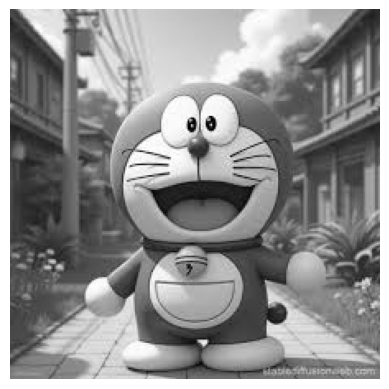

In [21]:
print(arr.shape)
arr2=0.299*arr[:,:,0]+0.587*arr[:,:,1]+0.114*arr[:,:,2]
plt.imshow(arr2,cmap="gray")
plt.axis('off')

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

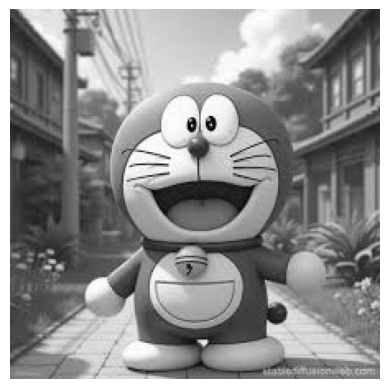

In [3]:
gray=cv2.cvtColor(arr,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.axis('off')

In [22]:
print(arr2)
print(gray)
print("")
print(arr2-gray)
print("")
print("")
print("")
print("There is a slight deviation in the pixel values of both the grayscale images although the deviation is not much hence there is not a major difference between the results")

[[ 70.72   68.225  72.072 ...  45.143  47.844  42.186]
 [ 70.72   70.225  66.072 ...  44.143  47.072  42.588]
 [ 67.937  69.866  67.072 ...  42.072  46.061  43.588]
 ...
 [127.896 129.896 134.896 ... 122.939 120.939 121.879]
 [118.896 120.896 123.896 ... 126.412 125.238 123.238]
 [126.184 126.184 126.184 ... 122.896 122.124 124.238]]
[[ 71  68  72 ...  45  48  42]
 [ 71  70  66 ...  44  47  43]
 [ 68  70  67 ...  42  46  44]
 ...
 [128 130 135 ... 123 121 122]
 [119 121 124 ... 126 125 123]
 [126 126 126 ... 123 122 124]]

[[-0.28   0.225  0.072 ...  0.143 -0.156  0.186]
 [-0.28   0.225  0.072 ...  0.143  0.072 -0.412]
 [-0.063 -0.134  0.072 ...  0.072  0.061 -0.412]
 ...
 [-0.104 -0.104 -0.104 ... -0.061 -0.061 -0.121]
 [-0.104 -0.104 -0.104 ...  0.412  0.238  0.238]
 [ 0.184  0.184  0.184 ... -0.104  0.124  0.238]]



There is a slight deviation in the pixel values of both the grayscale images although the deviation is not much hence there is not a major difference between the result

In [23]:
print(arr.shape)
print(gray.shape)

(225, 225, 3)
(225, 225)


In [24]:
print(arr[1,2])
print(gray[1,2])

print(arr[30,21])
print(gray[30,21])

print(arr[111,122])
print(gray[111,122])

print(arr[81,202])
print(gray[81,202])

print(arr[147,222])
print(gray[147,222])

[76 62 61]
66
[59 45 44]
49
[72  8 24]
29
[53 42 40]
45
[47 62 55]
57


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [7]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

[[ 6.74806800e+06     +0.j         -7.76443994e+05-131142.5416981j
  -2.42292714e+05+297400.3099492j  ... -3.52340004e+04 -80590.06956871j
  -2.42292714e+05-297400.3099492j  -7.76443994e+05+131142.5416981j ]
 [ 7.38686529e+05-304170.86240268j -6.21358776e+04+313814.00837188j
  -3.14930788e+05-236318.99665684j ... -8.36138953e+04-140233.53198937j
  -1.21910761e+05 -12914.04902285j  1.33543637e+05+451854.7497499j ]
 [-2.28745372e+04 +21849.50302439j  2.48686607e+05+186351.71524949j
  -2.63105880e+05-145851.92623613j ...  2.09739355e+05 +52509.07518712j
  -1.10179828e+05  -6109.35812214j  2.37659488e+04 +40065.4302752j ]
 ...
 [ 9.67937083e+02+102754.69622273j -6.18766878e+04-235543.83601857j
   1.89889488e+05  +3834.01853398j ... -1.86922160e+05+136802.57265134j
  -8.13664088e+03 +47637.92946328j -4.88002432e+04-305520.04304605j]
 [-2.28745372e+04 -21849.50302439j  2.37659488e+04 -40065.4302752j
  -1.10179828e+05  +6109.35812214j ...  1.54525456e+05 +91120.27570614j
  -2.63105880e+05+145

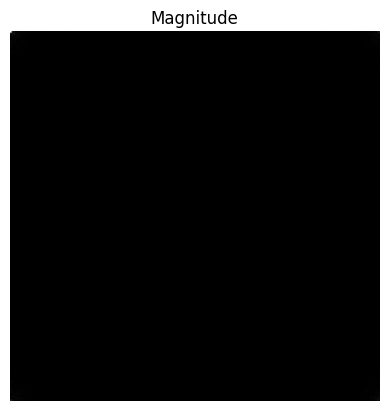

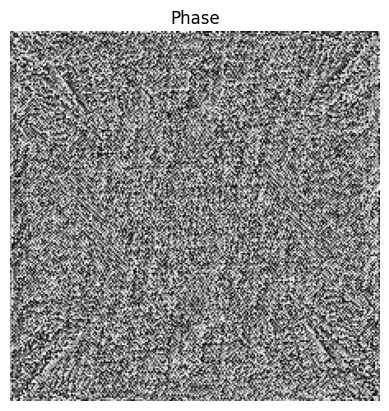

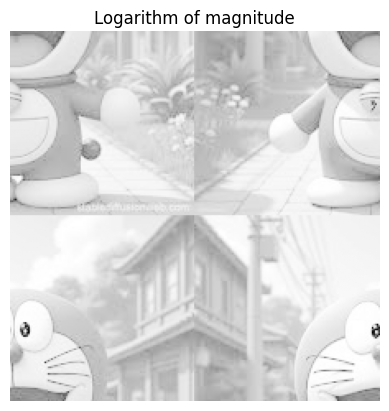

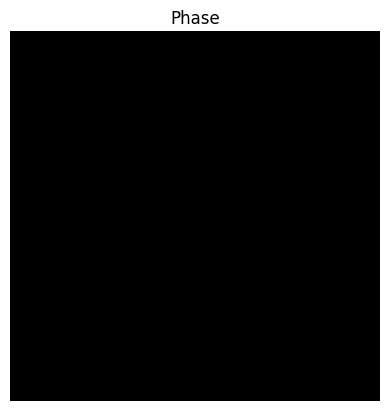

In [34]:
fftarr=np.fft.fft2(gray)
print(fftarr)
plt.imshow(np.abs(fftarr),cmap='gray')
plt.title("Magnitude")
plt.axis('off')
plt.show()
plt.imshow(np.angle(fftarr),cmap='gray')
plt.axis('off')
plt.title("Phase")
plt.show()

print("""


""")

fshift=np.fft.fftshift(gray)
magspec = 20*np.log1p(np.abs(fshift)+1)
plt.imshow(magspec,cmap='gray')
plt.title("Logarithm of magnitude")
plt.axis('off')
plt.show()
plt.imshow(np.angle(fshift),cmap='gray')
plt.title("Phase")
plt.axis('off')
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [9]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

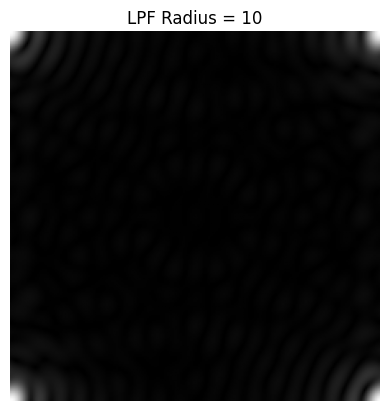

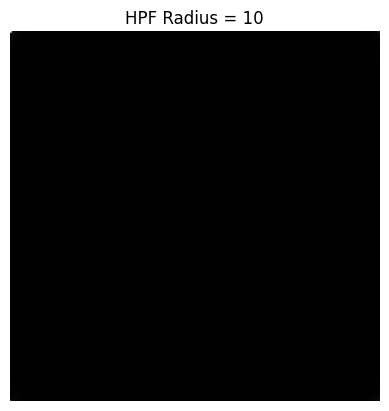

In [41]:
rows,cols=gray.shape
crow,ccol=rows//2,cols//2
radius=10
mask_lpf=np.zeros((rows,cols),np.uint8)
mask_hpf=1-mask_lpf
cv2.circle(mask_lpf,(ccol,crow),radius,1,-1)

f_lpf=fshift*mask_lpf
f_hpf=fshift*mask_hpf


fishift = np.fft.ifftshift(f_lpf)
imgback = np.fft.ifft2(fishift)
img_back = np.abs(imgback)
img_back = img_back / np.max(img_back)  # scale to 0-1


fishift_hpf = np.fft.ifftshift(f_hpf)
imgback_hpf = np.fft.ifft2(fishift_hpf)
img_back_hpf = np.abs(imgback_hpf)
img_back_hpf = img_back_hpf / np.max(img_back_hpf)  # scale to 0-1

plt.figure()
plt.title(f'LPF Radius = {radius}')
plt.imshow(img_back, cmap='gray')
plt.axis('off')
plt.show()

plt.figure()
plt.title(f'HPF Radius = {radius}')
plt.imshow(img_back_hpf, cmap='gray')
plt.axis('off')
plt.show()

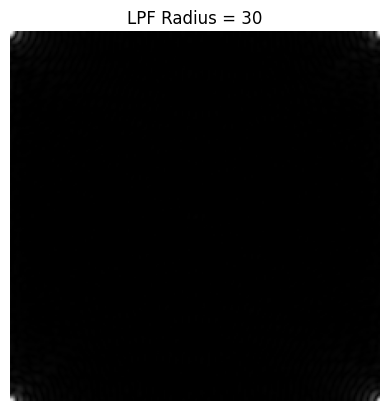

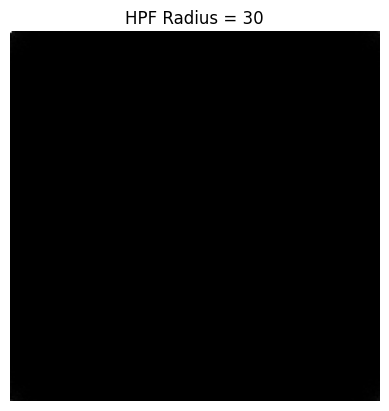

In [42]:
rows,cols=gray.shape
crow,ccol=rows//2,cols//2
radius=30
mask_lpf=np.zeros((rows,cols),np.uint8)
mask_hpf=1-mask_lpf
cv2.circle(mask_lpf,(ccol,crow),radius,1,-1)

f_lpf=fshift*mask_lpf
f_hpf=fshift*mask_hpf


fishift = np.fft.ifftshift(f_lpf)
imgback = np.fft.ifft2(fishift)
img_back = np.abs(imgback)
img_back = img_back / np.max(img_back)  # scale to 0-1


fishift_hpf = np.fft.ifftshift(f_hpf)
imgback_hpf = np.fft.ifft2(fishift_hpf)
img_back_hpf = np.abs(imgback_hpf)
img_back_hpf = img_back_hpf / np.max(img_back_hpf)  # scale to 0-1


plt.figure()
plt.title(f'LPF Radius = {radius}')
plt.imshow(img_back, cmap='gray')
plt.axis('off')
plt.show()

plt.figure()
plt.title(f'HPF Radius = {radius}')
plt.imshow(img_back_hpf, cmap='gray')
plt.axis('off')
plt.show()

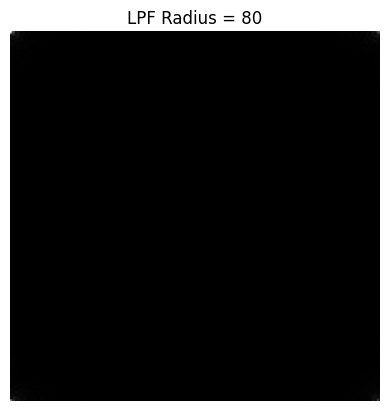

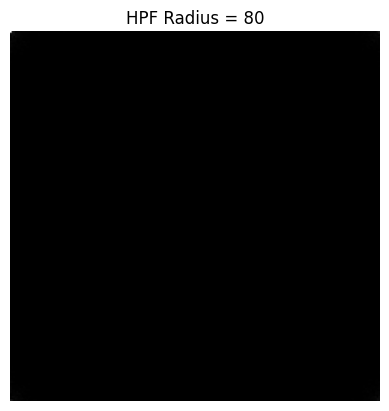

In [43]:
rows,cols=gray.shape
crow,ccol=rows//2,cols//2
radius=80
mask_lpf=np.zeros((rows,cols),np.uint8)
mask_hpf=1-mask_lpf
cv2.circle(mask_lpf,(ccol,crow),radius,1,-1)

f_lpf=fshift*mask_lpf
f_hpf=fshift*mask_hpf


fishift = np.fft.ifftshift(f_lpf)
imgback = np.fft.ifft2(fishift)
img_back = np.abs(imgback)
img_back = img_back / np.max(img_back)  # scale to 0-1


fishift_hpf = np.fft.ifftshift(f_hpf)
imgback_hpf = np.fft.ifft2(fishift_hpf)
img_back_hpf = np.abs(imgback_hpf)
img_back_hpf = img_back_hpf / np.max(img_back_hpf)  # scale to 0-1


plt.figure()
plt.title(f'LPF Radius = {radius}')
plt.imshow(img_back, cmap='gray')
plt.axis('off')
plt.show()

plt.figure()
plt.title(f'HPF Radius = {radius}')
plt.imshow(img_back_hpf, cmap='gray')
plt.axis('off')
plt.show()

In [54]:
#When we take the FFT of an image, it breaks the image into different frequencies. Low frequencies represent the smooth parts of the image like shapes and colors. High frequencies represent edges and fine details. In the FFT the center shows the low frequencies and the high frequencies lie in the corners. A circular low-pass filter is like a circular mask that lets only the low frequencies inside the circle pass through and blocks the high frequencies outside. The radius decides which frequencies are allowed. If the radius is small only the very low frequencies pass, so most details are lost and the image becomes very blurry. If the radius is large more frequencies pass, so more details remain and the image looks less blurry. Only frequencies with distance ≤ r from the center are kept.

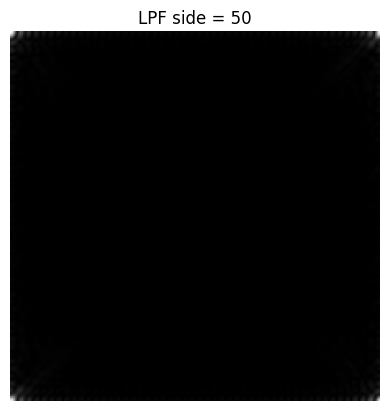

In [44]:
rows,cols=gray.shape
crow,ccol=rows//2,cols//2

side = 50
mask_lpf = np.zeros((rows, cols), np.uint8)
half_side = side // 2
mask_lpf[crow - half_side : crow + half_side, ccol - half_side : ccol + half_side] = 1

f_lpf=fshift*mask_lpf

fishift = np.fft.ifftshift(f_lpf)
imgback = np.fft.ifft2(fishift)
img_back = np.abs(imgback)
img_back = img_back / np.max(img_back)  # scale to 0-1


plt.figure()
plt.title(f'LPF side = {side}')
plt.imshow(img_back, cmap='gray')
plt.axis('off')
plt.show()


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [14]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

/tmp/ipython-input-1668674668.py:1: RuntimeWarning: invalid value encountered in divide
  phase_only = fshift / np.abs(fshift)


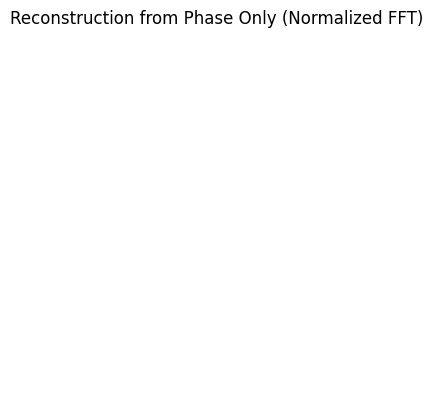

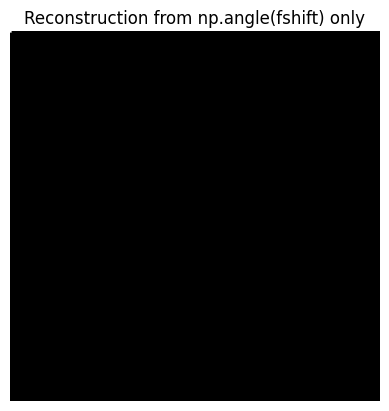

In [15]:
phase_only = fshift / np.abs(fshift)
f_ishift_phase_only = np.fft.ifftshift(phase_only)
img_phase_only = np.fft.ifft2(f_ishift_phase_only)
img_phase_only = np.abs(img_phase_only)

plt.figure()
plt.title('Reconstruction from Phase Only (Normalized FFT)')
plt.imshow(img_phase_only, cmap='gray')
plt.axis('off')
plt.show()

phase_angles = np.angle(fshift)

f_from_angle = np.exp(1j * phase_angles)

f_ishift_angle = np.fft.ifftshift(f_from_angle)
img_from_angle = np.fft.ifft2(f_ishift_angle)
img_from_angle = np.abs(img_from_angle)

plt.figure()
plt.title('Reconstruction from np.angle(fshift) only')
plt.imshow(img_from_angle, cmap='gray')
plt.axis('off')
plt.show()

In [57]:
"""
phase_only = fshift / np.abs(fshift) creates a phase-only spectrum. It divides each complex FFT coefficient by its magnitude making it 1 for every frequency. This gives a complex spectrum on the unit circle in the complex plane and reconstructing with this spectrum keeps most of the structure and edges because phase that information. The image looks recognizable but has low contrast due to lost magnitude. np.angle(fshift) returns only the phase angles (real numbers in radians), not complex values. the result is meaningless because the complex form and magnitude are removed and phase is not converted back to complex numbers thus we get a random noisy image.

"""


'\nphase_only = fshift / np.abs(fshift) creates a phase-only spectrum. It divides each complex FFT coefficient by its magnitude making it 1 for every frequency. This gives a complex spectrum on the unit circle in the complex plane and reconstructing with this spectrum keeps most of the structure and edges because phase that information. The image looks recognizable but has low contrast due to lost magnitude. np.angle(fshift) returns only the phase angles (real numbers in radians), not complex values. the result is meaningless because the complex form and magnitude are removed and phase is not converted back to complex numbers thus we get a random noisy image.\n\n'

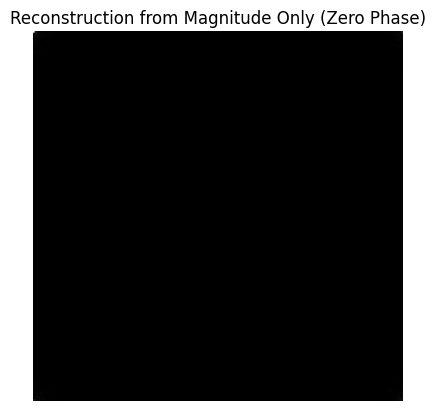

'\nThe FFT magnitude has values that can be extremely large and extremely small. If we plot them without log scaling the large values overpower the image and the smaller important details cannot be seen at all. A log scale reduces this huge difference and compresses the range so both strong and weak frequency components become visible.\nThe image made from magnitude only looks very different from the magnitude spectrum picture because the spectrum image is shown in log scale just for visualization whereas real reconstruction needs both magnitude and phase. When we remove the phase all frequency components line up in the same way so the result becomes uniform. Phase carries the important structure of the image and without it edges, shapes and textures disappear and thus magnitude-only reconstruction looks like random patterns instead of the original image or the nice log-scaled spectrum.\n'

In [56]:
import numpy as np
import matplotlib.pyplot as plt

mag_only = np.abs(fshift)

fmag_only = mag_only * np.exp(1j * 0)

fishift_mag_only = np.fft.ifftshift(fmag_only)
imgmag_only = np.fft.ifft2(fishift_mag_only)
imgmag_only = np.abs(imgmag_only)

plt.figure()
plt.title('Reconstruction from Magnitude Only (Zero Phase)')
plt.imshow(imgmag_only, cmap='gray')
plt.axis('off')
plt.show()

"""
The FFT magnitude has values that can be extremely large and extremely small. If we plot them without log scaling the large values overpower the image and the smaller important details cannot be seen at all. A log scale reduces this huge difference and compresses the range so both strong and weak frequency components become visible.
The image made from magnitude only looks very different from the magnitude spectrum picture because the spectrum image is shown in log scale just for visualization whereas real reconstruction needs both magnitude and phase. When we remove the phase all frequency components line up in the same way so the result becomes uniform. Phase carries the important structure of the image and without it edges, shapes and textures disappear and thus magnitude-only reconstruction looks like random patterns instead of the original image or the nice log-scaled spectrum.
"""


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

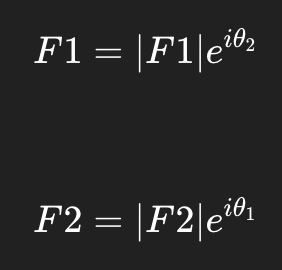

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [18]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [27]:
import base64
with open("download.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUSExMVFhUXFxUYGRgXFRcYFhsfFxoYGBoYHRUYHSggGBolHRgXIjEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0mICUtLS0vLS0tLS0tLS0tLS0tLS0tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAPkAygMBEQACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAAAQMEBQYHAgj/xABCEAABAgMFBAkCBAUDAwUBAAABAhEAAyEEEjFBUQVCYfAGEyIyUnGBkcGh0QdiseEUIzNjgnKSolOy8TRDc7PCJP/EABsBAQACAwEBAAAAAAAAAAAAAAACBAEDBQYH/8QANhEAAgECBAMFCAICAgMBAAAAAAECAxEEEiExBUFRE2FxkbEGIjKBocHR8ELhFCNSchVD0jP/2gAMAwEAAhEDEQA/AOzEvU0UMBrAA9b294YABSoqT3uHNYAQAAXRVJxVpzT3gAIBF00SMFa819oAU1qaEd3jzSAB63t7wwAAtUVUcRpACAAC6KpOJ0gAal3d8UABrjRu7x5pACkubxooYJ15r7QA1aLSmWDMUoDUEs3LRGUlHc2U6U6kssFdmQ2v07RLvJkpvE5qw9BFWpirbHoMH7PznrVdu4xe0eltpmU61SRoksPYRTnXm+Z6TD8HwtJfAn46lUdpT8eumf71feNeeXUvf4tDbIvJGl2Ttrakpl9XPmoGUyWtT+RIveopFmnUxEdbNrwOJi8Jwmq8rlCMu6SX9eZ0Do70il2oFSAUzk0XKV3k5PqRF6lWVRd/Q8rxDhtTByV9YvaS2ZcCmFX73DmvtG05wgAAujunFWnNPeAAhxdNEjBWvNYAUl6mhGA1gAet7e8MAALVFScRpACAAC6KpOJ0gBOpR4/0gD0X3u9uwAVf+5mcvtg0AA/Ljvc+8AIGancz15wgALNX

In [26]:
import base64
with open("download (3).jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUTEhMWFhUXFRcXFxgXGBUVFxUWFRUXFxUYFRcYHSggGBslHRUVITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OGxAQGzAlICYtLS0tMi0tLy8tLS0tLS0tLS0vLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQMGAAIHAQj/xABFEAACAAQDBAcEBwUGBwEAAAABAgADBBEFEiExQVFhBhMiMnGBkUJyobEUI1KCksHRBzNisvAVU2OiwuEWJENzk9Li8f/EABoBAAIDAQEAAAAAAAAAAAAAAAMEAQIFAAb/xAAvEQACAgEEAQMDAwMFAQAAAAAAAQIRAwQSITFRE0FhBRQiMnGhgbHwQpHB0fEV/9oADAMBAAIRAxEAPwCsYFi7yJizZZNt4/UR27AcYl1MsPLN+I2EGPnWQ+T9ItnQ7pI1JNVwSZTHtrt0iYyrgrmwrIrXZ251B2iNWXS0b0tXLny1myjdWF9PzjHFoMnZnTg4ujkXSx1lzmlL3LkroeyTtENaSiqHlS5qVIsLAWTZy2wp6X4g0ya2aSUsTa51Nt9oY0nSkrKEvqQBYb9/GKYxvJdKg5DO66WHn9Ydcy5bWuNhMPsDfsvL+yTbwMIaWahIqDmBFrgbM2wEw7ZOqqEcdyaLHk20QVC0/AQy/V80b84mbvA8RGzJ2mH2h8YiQ9gcjaLAWTMIjIiciNCIumCZARGhETkRoVi1lWiAiNSImIjUiJsq0QFY3p5BdgvExsVhv0eAu3GIyT2xbL4se+aixjRYcksaDXeTBYUDZGk17RA1RGa90uWbSUYKkRVlRaFk17wTPBMCsINBJAZuwOt7sLckOHZdhjeomS2GVQBaGIZVHgTy6dze6xJlhdjWJpTpmOrHurvPODMbrkpk

(np.float64(-0.5), np.float64(201.5), np.float64(248.5), np.float64(-0.5))

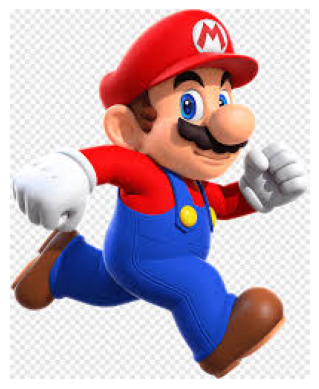

In [28]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUSExMVFhUXFxUYGRgXFRcYFhsfFxoYGBoYHRUYHSggGBolHRgXIjEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0mICUtLS0vLS0tLS0tLS0tLS0tLS0tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAPkAygMBEQACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAAAQMEBQYHAgj/xABCEAABAgMFBAkCBAUDAwUBAAABAhEAAyEEEjFBUQVCYfAGEyIyUnGBkcGh0QdiseEUIzNjgnKSolOy8TRDc7PCJP/EABsBAQACAwEBAAAAAAAAAAAAAAACBAEDBQYH/8QANhEAAgECBAMFCAICAgMBAAAAAAECAxEEEiExBUFRE2FxkbEGIjKBocHR8ELhFCNSchVD0jP/2gAMAwEAAhEDEQA/AOzEvU0UMBrAA9b294YABSoqT3uHNYAQAAXRVJxVpzT3gAIBF00SMFa819oAU1qaEd3jzSAB63t7wwAAtUVUcRpACAAC6KpOJ0gAal3d8UABrjRu7x5pACkubxooYJ15r7QA1aLSmWDMUoDUEs3LRGUlHc2U6U6kssFdmQ2v07RLvJkpvE5qw9BFWpirbHoMH7PznrVdu4xe0eltpmU61SRoksPYRTnXm+Z6TD8HwtJfAn46lUdpT8eumf71feNeeXUvf4tDbIvJGl2Ttrakpl9XPmoGUyWtT+RIveopFmnUxEdbNrwOJi8Jwmq8rlCMu6SX9eZ0Do70il2oFSAUzk0XKV3k5PqRF6lWVRd/Q8rxDhtTByV9YvaS2ZcCmFX73DmvtG05wgAAujunFWnNPeAAhxdNEjBWvNYAUl6mhGA1gAet7e8MAALVFScRpACAAC6KpOJ0gBOpR4/0gD0X3u9uwAVf+5mcvtg0AA/Ljvc+8AIGancz15wgALNXuZa84wAp/Nju8+0AFX/ua5fbCAAPu97egBAzdnub0AFG/t5DP74vAAfzYbvPtAFXtzbiLMl1sqbkAcPP6xpq1lE6GB4fUxMui6nL9vdIJk9RKlFtMo586jke2weAp0I2ijPTJzxpbOklY8pjBK5vPwz2KiYtU9Ye4bqXGBYEq86pA0cxewdJO82eV9pMdOGXDwdrq78Nkvo79dCys/TDqrdOSovZ1Lutmi4AgqTqCUkkcXFXfZ29qjT2KX/iVUwUJR0na/inqk++z0fyfdHsm0v4m1zDLaXOBKrMoBnCAxlLbFKgCqrs6owpdpN235fg2yw7wmGip6wek10b/lHo1t36eJt9lW4T5YmIDE0mJOIUKKT5ggxZhPMrnn8Vh3QquD16Pqns/miUGancz15wiZXAs1e5lrzjACn82O7z7QAVf+5rl9sIAA+73t6AEDN2e5vQAjytD9YA9M1CXJ3tIAG3Xr4oAAHwo2J8XPzACO/aZgN3Xn4gAJbtM4O7pz8wApDUNXwPh5+IAG3Xr4oAAHoCxG9rACAv2gGA3dYAH3svDzzWAKjpFtpNmQS4K1Dsg7vPxGitVyqyOjw/ASxM9fhOS7W2oqYoqUSSY50pXPdYehGnFRiikmz3jWWzwkwM3H0GAN10I20JNktR3kG8kcZiUpT6Xkxfw07Un3HkeN4V1cfTXKSS8m7+SJPQLYybTJtXWOy7iArEpUkFd4HMi8g8a6woQzKVzHFcW6FWlk3jd/J6W8NGObb2IqxWWzTksZ0qbemKGBK6s+aQUJR5E6mMzh2cU1ujGFxaxlerTl8Mo2Xy++rfiW+wren+OnykK7E1MuejTtJBI9cfWJwmu1a62ZUxeHlLAU6slrFuD+T08tjVO/aZgN3Xn4iycMCW7TODu6c/MAKQ1DV8D4efiABt16+KAAB6AsRnrACAv2gGA3dYAOuHg+n7QAAABk1ScTpAAwZtzI58u+UABq16gHd480gBSS7nv5DLnGAAEu47+Yy5wgBAGe7UHvcOawAMGbc1z5fhAAQCGVRIwOsAKXNVUUMBrAEa321MlCpqiygMP0iE55Vc34ehKtUUInHekW2FTZilqOLxzJybZ7zCUI0YKMTMT57xqZfTGQqMGbjqDAkh2/AkWXRzaxkTgsJvoUCiYnJSVY0NHz99Y3UKvZy7nuc3iuB/y6No6SjrF/b5+qRvtj9JbPIR1UlKwm8pVQN4vmXpQeQi5GvTirK55qvwnG1pZ6jjeyW75fL9ZJ2t0gs1okmTNXdCigmofsqSpsc2b1jMq1KSs2Qw/DMdQqKpTjdq/wBU19zK7LtpTbxaCZSZd4JAE1DJQAEpSxOSQPrFOM/9ufl9j0dfDJ8P/wAe0nK172esnq3tzZ1Oz7WkTO0mdKUvAALT+j8THSVSD2Z4ipg8RT+OEl8mTAS7iqziMucImVhAGe7UHvcOawAMGbc1z5fhAAQDRVEjunWAFLkuqihgNYAXrJnhHPrAHkEEOmiRiNYAHDPuZDPl3zgANGvVB7vDmkAKQXY9/I5c4wAAF2HfzOXOEAIKvdoB3uPNYAHDPuaZ8vxgAJADqqk90aQApBBZVVHA6QBzX8QNu3l9WC4TiRmdfiKFeeZnrOE4TsqeeW7ObWu0uYrM7sWRL8RNqZ7CowSuOyEqWWSPXKFhn5IspVgCQ6j6nCM2JKQ1O2lLTRPa8qD3jKi3sa6mJhD4mRJu01qwoOETVPqyjPiKXwpfMiqtWqj7tE1CPQryxlaf8vI9IWDGcq6Gp1aj/k/Ni32whlj0Mxr1Y7SfmzX9AumE+VPlyVLKpa1BDEvdvFgRpVo2U5OD02KuMowxEG5JZkrprT5PrfzO1ir3aAd7jzWLx5UHDPuaZ8vxgAJADqqk90aQApcFlVUcDkIA9dXM8Q59IA8u9WZt3WAB95q+GAAUri+Xh5+IARm7LuDvac/MADP2XYDe15+IAUl64Nl4ufmAB95q+GAGrTaUykmao0ZyNOHnlEZSUVdmylSlVmoR3ZgtqdMpjKu9lNWzUfM5ekU5V5PY9Lh+E0oWzav6HNNqW8qJJMVzsKy0RTrmQsSUxQuI2NimT7FYSvtKN1HGj/tCxnNclzNpoQk9Um8EiqzRAbjn6RNQbK1bHUqSMhtHb82YaqYc5YCLkMNFb6nm8TxqtU0h7q+v7+3F2TtxUtYvgLScaC8BqDn5GJToprQpQxdS/vu50aRZ0qSFJYggEHgYovQ6KSauiLtmzoRJmTFJBCUkt+g94zBNtIjN5IuXQwditCx3sDUUb24RaqwS1RjBYipJ5ZalgJrxoOqbL8Mejy7TakzSGlSVBSlHBxVKBqSWPk8bKUc0ipja6o0n1ei/J3Yl64Nl4ufmLp5kH3mr4eftAAC1Wd8tIAQBuy7g72kAHUD/AKnPvACl97vbsAFX/uZjL7YNAAPy473PvACBmp3MznzhAAWavcyOfOMAKfzY7vPtABV/7mmX2wgDIfiPbOrkoAxUo3vMD94q4l7I7nBKac5S6HI9oW8mKh6NtIo58yM2NUp2GL8ZsQzjtlVeWEpAJxbLz8ozkdrmurjIQ93n0NDK2YVMZir35cEj/HP1iJTq4upU7kP7W2YV2dcuWO0QAPUgH6PEqbSkmynVi5QaRJ2J0XlyEhRQFL8RS9dE8uYlKpKo7IjCjClG78y3tew0TU3Z8lQQqgUuWpIrQMpuydKgxhwqU/eCqUa3u3LTo50S6qV1apt8JUbigKlJYi9+YEkU0fNhpqVMzubILs1leodJOiAnyTKSpTKUi92XN1KgpTBNSSEsGGJiVGTz6LUhXlGULPRFDtzoSu0mUizSmWglJCv5bIZ3UFMaEJ49rjGyGdtwe5sUqUMtW+mxa9HvwkYhdqnApGKZT+xUoA+wzxjfGg+ZGrxaKVqUb97/AAdNsVilSZaZUtARJT3QkZ8cycamLKikrI49WrOrLNN3ZJP5sd3n2jJrCr/n0y+2EAAfd729ACBm7Pc3oARpWp+v2gD0Q1DVRwOkADVu7/igAFXahHe481gBAQReFEjEa80gAJAF41ScBpzWAFNGBqT3eHNIAGrd3/FAGR/EqxGZZbyRWUp1cXoT7xXxEbpM7HBqyjVcHzXocTnoimek3K+0EDMRlGmehBUsmgjfGCWrOTiMW/hp+f4JewF3bQl83T71/UROprEoQ0lc6Ps3Z6phpQaxTk7F6Ebmr2fsmWnK8dT9o0uTZsehTdLrRaFWiXZbMVpWtICBLUEKWoha1DrCRdAQgnEeuEei4VSoUsO69VXbeVLwX75HneI15zxCoRdrLM/OxO/C7pEq0ibYrSsTuwVoUohSikEIWhZzKSU1NS50Eb8ZRp5FWpKyelu81UZyu4S3RobBJuKXKJe4WD4tiPViI83Uhlm4o7vaZ6cZlX0xtU6TJ62StSLiry1pKOygAgkhfeTeKXAc8Iv8JlRjWfbRurW8NVqUOI9o6S7N6389HoaHYlu69EmfQKWhSVthelli3A9r0IixjMP2GKy+PluithcR2+FzLuf2Zb5XmZIxTrzT2jBgCQBeNUnAac1gBTShqT3TpAA1bu94oAAHomhGJ1gBAQReFEjEawAnXI8P6QAoDC6KpOJ0gAal3d8UABrQ0Aw480gBXc3jRQwTrzX2gABY3hVRxTpzT3gBBSgqDjwgAal3d8UAeJ8hMxJlr7hDPq9Iw0mrMnTnKElKO6OfSdmWSyuoIStTn+YtIUf8QaIHlXUxypT6HpG6lX4nZdF9+pA6QKstplKQuUkqyN0BQ4hQqPeMQm1I1VKXunLbTYDIWZZqMUnMjjxEXHLNqc9Qy6Hizolkg5u4r9REJOSN1OMXudP6HWvrEVxSWPHAv9Yq1C3BWNhIEa0YmYH8WNnqUqVMSFdkhRuPeaqSQ1adn3j0/CYqph7PaM9fBr8nleIz7HGJvTNCyb2vGV/Rkf8AByyqTbLzEBMmY7hmvKSEg6Es7cDpFzGQVPDZesrrwI0ZudRy7jpU+1AWiYrLsg+iRHlcS7VT0WGhmofMqtpmRbLqJkpExCVBYCxeF4Ape6aGijQ6xBSlFtrS5tjRhJe9qXNjlYNSI6yd2yM7RVktCwSpSagxuWaGqZWajLRom2ec7qAdWBHz9Iu0audFKrTyMcAagqDidI2moGpd3fFAAQ9DQDA6wApL9o0UMBrAC9evwfrAHkNu93egAo39vLX74vAAfzYbvPtACl3r38tOcYAA707+en20gBB+XDe594AKN/b+v3xgBq1kiWo5XVXPY/Ea6vwPwNtFJ1I36oxyJIKASHB1jjs9E371jJW+i1ACgJiYZQ7est9AUMUv+4jdCRUqw6GW/hUqNFFJ9wfSN2drc1Rpp6p2OydENhizyQDUntEnEk8j2ivLV3LKdkXlqtqZSbxHtjELEct9zkNu6Wzl2ibeJmSjMUpKFKKSjIBC01RQClUnEpJjsYec6FpU3Z28/Fczj4inTrXhUV1c1/RXpZYJSSgFUhSi6jMSpRUdetDgjR2HCI4nE4iq80tf3oZo4ejFWWiGp3SSVNWtEtYOnaBJBNVHifmOa4SvmkdaMoZckWT9l2kJLRiZKmzU2O0UjUpWFSFyb14MSc7lfJYl7NWSo3cW+RFjCP32V8UvdJw/Lhvc+8dAoBRv7f1++MABbe7u7z5QApfe7+7ACtM1H0gDyC9RQDFOsAD72XhgBTTGr4Dw8/EADN2Xcne05+YAGfsuxG9rz8QACtRRsR4ufmAEfey8MACqBzUHd0eMNXVjKdndGTEi4pdnVQgug6gxyJwcXlZ6CNTPFVY/MzvSeyFEwFmCkv6ih+PeMxVjKkpIoRKx4mJohJ3GrD0OlqnJnXiEg3ijJxh6Zt8UiXaO1iKp63Rvkz2DRqbN6SKrb850pHn8QhuRqaI45t2zLkTlKINxRcKyD5HSOjSmpK3M5NaDjK/I8y9opIY1jZY13EtE0ylotEvdLKGoOXOZEYlHMrMKTi1JG+2XtBM1CVoLg8t5xQlGzszpwkpK6NJs7aJFDGiUTfGXJlzJtwOBiFmSypmn2XZyE1LKNX4aR0sLScVd7s42LqqcrR2RMFaijYjxc/MWioD72XhgAJapqDgNIAVm7JLk4K0gBeoPj+p+8AIXNVUUMBrAA5d9/TLluMAAo92pPe4c1gBEp3RVBxOb8tAHvqXF0nsjDXnGM2A3apgQkzJhCUoq79n1OWURk1FXZOnTlUkowV2+RnLZ05saDe6y+sZISSn3/eK8sVTR1qPAMbU/jbxZTT/xOlpJMuQtROalAD2AP6xpeOXJHSp+y1R/HUS8EUO0+nRmgfyEgpLhV8uOGFRFeriO05HSw3s/Gjf/AGOz5WBXSqXOQETUlJGBxAPmPkRrVQhV4NUjdw1+hV2q1BwEqCicG10843qWZXOTWoyou0014l9s6cyA+MQZGLuOKtTGMGb2Pa0iYGJ8jGL2MtKSIk3o+F0JS3H7RntCPZmL6V9DgikkJCxUAAJvBq0izSrvmU62GVvdWplU2G0F0GRM0PZLf7sPrFrtIdSn2U9rETZ21J1mUerU1e0lQdJIpUZHyYxmUIzWpCFSVN6GjldPpoDGRLJ1vKb/AG/vGl4ZdSysXLobLodsbaG0RLnTVpkWQntdW6VKAOWKmLEPeauBzlTpwUnbdEKteo4q/M7Oi6f5b9lODY+UWCkQ7btIJLYqScsB58YyB+y2wHtLI84Ak4OpFXxgDyAAGTVJxOkYAnVS/EefSAPRcFlVUe6dIAKu2/mcuW4QA4iWNWObZxmwHEygAzUjAIto2ahVUuhWqC3uMD7RLMzFkR0z1yzcnMUmgWB2TwIyPCM6MK61Rzf8QeiAkf8A9MgfyVHtoGEsnAjRBOWROhDcnFYbJ70dvQ91wLjDxC7Cs/fWz/5Lv719V374m7FM9JcVoAS7AXPNzPSBl2asxZ1snpZSVlTbpLv64vG2FTlI42O4XCaz0FaXTky42ZtdM5LgscwcRGxrKzzl76Pcs7PaCIWuY2LGRbYg4k1MftVglWi6Vg3k4KSWUPIxhScQ4qQzM2ckC6mYH0mBj/vSPiMqTMOJU2jojLmKvLkSlHW8G+/0iarSWzNbowbu0W+yuh0klpkiSpmCEhAIS2bkBvQRhTnJ2i2RmqcFdpaGx2rN/hrGoy2AAujzOfp8R0qVPJGxyKlTtJ5mUPRDbV7sqNRj942x2Nc9y+6S2cCX/EIFRdCgM3ISFeYJHp5RkiVFimkEKJc/QeQjINNI2tLAF4gGMAmHBx3TUjWAPHWS/CefWMAcRLxDuDnpADt0M0ZMHi7dDIAHnGQekk5wB6BjAEmygtJSoODjGDJWCWGXZ5ovJIIrvJVSv1EJJSVmTpzlTmpwdmtUcL27YzZrRNkEvcUQDqDVJ8ykg+scOpBwk4n1DCYpYihGsua+vP6lbMnxFI3SmkgRaIzYwp3HkzowTuOO8YMorrZZFhXWySUrzbP0w94s4etGLtUV0cbinDHXTqUdJ+v7+6kmwdKVJA69BAwvgFvIjIx1qvC2oqpS1i9jxMOIWk6dVWktH4mksm0ETAClQI4RzpQa0ZdjUT1RZ2a2FMapRN0Z2LyzW1CwygD5xqaaNm+xNs8iW/ZQH94xq9CMm0rtmlsFjuhzRXNBHTw9DIrvc42Ir9o7LYq+nNbHMJ7JoAnWv/n2iyV0clsc9ctQUklx7+XEQJMuttdOJwkiQUEXii8o5JcKoM3YeheMmEh/Y+1lT6JLAUKsSf8ATl68gYaNpsCbLl4APmo1UfNRrAwaVFqSqgNYAQzz/wBPn2jAIwtIBUN0Fh7A/IjbFJogxxFqBwMZyi57E2FhcUgFny4mItGbj6IizJ6vRgFTtybdCF6Kb0P7gQRk5f066PWu020rkSFFJRLBWWSglvEpgaNFGvQc53R6fhnE6eHwqhOXNmc270C2jIAJk3wznqzfI/xFfpEP8dx5Fj/y0KzspW8dDLJtBSWUCCMQY1OBep4trclSrTGtwL9PEKRMkzo1tFuM7ktCnjBtuRFywmYxDpmCoODj70+seu9m8XmUsPPxXhz+vqfOvbDAdnWjiofy0fivyvQjz9nqluuQpSTjdHx9jFzi/C4um61Pdbru/o43CsZ/sVGps9n3/wB+o5Zukk9MsqNxZSxLhiU51BABzwyMeWpU4SmoydrnoMSp0oZoq5oOj/S6WZjTpBUjG9LWxbLsqGfmI11YKlJxmW8HhJYyKdFpaX1X0Ok7E6W7NKggLEkqw6wFJJ0v1T9Y3UZ0f4795Q4hw3HUf/01Xdt+RdtfiNYZBKTMM1ScBKDj1UaaRtlXittSvS4XWmrytFd+/kZDpH0oNuRKmoBSGLId63ikg8S0bISzRuVK9Lsqjhe9ir2RdKwSHGh+REzUyZ0xkS1FJAPWKDqrRu6mjY01yGsZMIodlW1UhV0B3NND56NGCT1OhbJlAkLmLvO3ZT2Uj1xP08oETebPXKSkXEpT5ACBgk3lZYQMGO6UWlSOtKaB5Sx/klST/wDXBMyR9k7TaXLKj3g8TUtDDRd2XaAVnDMYsWcqZBsWH+tiJk8KtEYMkTaFk61DEsApJOtDhAE2gAJqk4DSMAU0oqqjgdIA+Y9uJK5k0t2+vnkk/mmKIc44ERo4h/rxMk+70R6jhVN1sFDJvr6sgosUwZpPkT9opOpA6lPA4lc4/Jv0t9yZIQRjGmTTOlRhOO5YSY1lxHjaI7APhUk+/Z+Y6XCKvZ4yD6u3np6nC9paHa8On1jaXk9fpclJVnH0vRrU+S3ad0RJ1kSVEsz6YEHUe49I+ZY+hLB4mVLkndeD2/B9dwKpcVwUK70k1aX/AGWjuu/fwZD2Ynq0lGJSopJ+qfpX1jdxCmqlGniY81Z+K/K9CjwCbw9atgp7wd13p/v1JVslCYgpzy88o5UJZXc9JiKSr03Dy8TOolKOAPxF1yijy1KlVkkrM0fQza3UzhLVg7pOhzbnWLFCfI5XE8O4yzdNGdQ21YETZX8XKA6xIeYBvp8beIZnMeUWTkFQkSp4CphIKRUpIdhVqiAM/abNeN5NGLjP0fODMpljY7TOYJTjlnAwbfotsy0Ehc1ZCTgNf2gDZiSvxRgwU3S2zGbZZvZ7YAUBmQmp+hMAc7M5rPIJy60H0Woj6NGTJ62PtNQXU0gDcWC3uMYyYHbTtIJDqIA4xgEaybWSs9kvAGgsKjcfEvQa5fMAPAt2hUnEaRgEe2zRLlLIqLqiTpSNlKOaaj3kZOybPm/aReao4OT+ucdrifDFikpRdpLyfc/z+rbwji7wMnGSvB79U+q+6/X5QSMf2948ZiMNVoSy1ItP926/I+j4LG0cTDPSkmvTxW6+Y68Vy9celGMEkz1aQ6FDgY6fCsFWxFeMoLSLTb5K2tvF9PscPj/EMPh8JOnUfvTi0o83fS/gub+5c9GdgTLUl0kJQkAFRBNWBYAYlm0xEeo417R4fhUYqcXKUtkunVt7fVnzHDYKeIu1ouom39gzLMRfYpL3VpwJ8JB7po/vjVuTGthvaOPaYaWSpBWcZdOWq5XvrZ76pc/RcJ4rPguanWi5U5O94vVO1no+qtzWxSSdmqmTghBTem0F4sm8nCrYkAJieJwE8Hwuoq2rj7+mtkrJ/Rtm2XGaFTi8cRRTyuOV6Wbdny8Ul+ojLKkKKFgpUklKgcQRQiPMq0oqUdme4pYiMkmmQZi6nzjaloU6lRKTK5a+1eGrj0wixHQ49a1RtvmdK6CdLzRCj2h9R5ZiLkKikefxOFlSd1sPbUswTOV1P9NRBCRk7Ep4gGg4RsKpodmdCZy0pUtSUAgG7Urb/S3zGAa3ZfRqRIAIT1is72X+I+XgYLkBhdFUnE6QAnUo8f1EAKoeLvbukAYvpzsZKZKVS0NdWorAwF9qgZCg94GTBWNRdfApPu4+IA2OyptBGQe+lPR4TJKlqWbykjq0uAlJOZDVOJf7QCGujWzurbNRpyIA6DLRdASO+BT5+YwYPQfd729AGb6cbRTLsxSg9/Lyrn6R0uGUc9XNyRoxErRscHtJ7R849EzniIW3PH94jKEZrLNJro9SVOpOnLNTbT6p2f0H0qGYH1H0FI59TgmCqO+S3g3/AGjsUfaTiNJWzqX/AGSfpZjySNP1+TGafAcDF3yt+Lf2sSq+1HEpq2dR8Ir73PU5XZV/pP6R1lGMKeWKsktlscKdSdSeebbb3bd2bz8NNpBMoy37SVP7gEFvp6R8n9roVqPEu26xjl6aJL1TPRcPtLDJd7v5/gtOnq0/wi3Z70u753g//G9Gn2JjN8XvHbLK/hb/AOrEeJ2/xnfqvX8HNZc24UTR/wC3MQv2P7x9ZxdFVqbpPaScfNNfc4FKeR5uln5O5p+mvQi1Wm0/xFkQlaFoSVC+lJvBw7KI3QmPlPB6VR4RKS2bXhZ/m57nD4+NH3ZSsU9i/CvaM0m+JcoDG8sH6IeOrGjLoSq8Tovm34L8mq2R+DtnSyrRPXMAxCBcHlVyfpG1UOrKE+KP+EfPU2uyeitis1ZVnlpGSiLy/wDcpzrG2NOMdkUquKq1filp05E2VsmQhV7qZYWe6QkfpgMomVybV/7n0+2EAAfd729ACBm7Pc3oAT+Vx+sAeiGoak4K0gBCh+wcc1HPhAFTa+jVnmJWkSwgnFQFXGBAw/8AMAY/bNmNhlhRWlalFkIrfVxZsK+8RlNRNkKbmUdp6Udt5y2IHdxA4UcQzpbmeyk9jQ9B+lFnnTzLreZkKIZJJp5vBVE9jEqUkrs6E27n4okawAegoRidYA5T+IW1hMmKAoE0HpT9XMeo4fQ7Oim92c6vPNI5ssuYts0iPz6iBgeTE0YHUmJpmD0sBQKTgQR7xmSzJphOzuM2S1TZKwylPglaQ9PCtOfPGOTjeH0sXFUsQrrlJb+DLdDEzo3lTfinsWVs2pOnN1qnAwGA82H7xs4ZwnDcPi1QjZvdvVv+u5GvEYmpXazvbktgs1mVNCpaA61AhI/Nu/VovV5Wg5dDVTV3Y7vsCzqRZpEpQKVplS7xOL3QVA+pI9I8S4QhKShs5Sfm2/udi7aV+iLAVwo2P5ufmAEBftMwG7rz8QAEt2iHB3dOfmAFIahq+B8PPxAA27n4v3gAAegoRidYAQF+0AwGKdYATr0+D6D7QAoAFE1ScTpAAwa7ua58vAEPbG0USJKp04shA7LYq0HmafWIyllVycIObsji/SHb65kxU+b/AFV9xOUtJwAGSiD6A6ktqTtq9y043WVbepj7ROKjEoQlUkoxWrEpKCuxpNpKKIJB1BaPS4XDQwy01lzf2Xd6nGrVpVnrt0O2fhz00lTpCbPPm3ZgcOs1UMQyjnkxili8HUu6kFp3fg2U6sfhbNxbZl2WonBKSUnVgWjn045pqPVm+TsmzgG37XeJOpMeztljY5L1ZnwuNOYzYeScfIfqYmiIqRpT9PaMpdAOoUfOJpmBwH0iVzArxkwF/wBPOkYuZsX/AEJS9rkj86f1ivi3ajJ9z9DZR+JHdGDXdzI8+seOOsBr3qN3ePNIAUku57+Q59YAASC4qs4jTmkAIA1E1B73DmsADBru5rny8ABANFUSO6dYAUuaqooYDWAF62Z4Rz6wB5DM6aJ3hrABRn3Mhny7wBzr8ULQL0smaFJReuympeoxVqAMRqAKuqK9Sa3LlCErWta5y+0S75KlEkmpJMVnUZcVJFXbmQbqc8ftHqsFhXh6alNe+/ounj18uRwMVWVWdo/Cvr3/AIIqBF2KKzJcpbRYi7Gpo2XRnpbaQU2YzSqUoFLKqzggMThVveIVKFKbz5feWt/3clGclpfQzu1JtYs1Hoa1uVqDFdE2PoPPkAfmNif75EWewqJXMDiVxNMwOJVEkyI4EHSJWYuKmUvIP5Y+wxjDvEKzNj+Flg6y1dYUumUCon6D1eOZxKrlotddC1h43kdicM+5kM+XePNHQA0a9V+7w5pACl3Y9/I5c4wAB3Yd/M5c4QAgzu0A73HmsAFGfc0z5eAAsA6qp3RpACl3ZVVZHKAFuTPEOfSAEd6szbusAZHpf0nEp0ILFu0RlwHGKlWpmeWO3Nl+hQUVnmtXsvuzkm0reqau+ryA0GkaJO5birFfMmZc8/aOtwXCqrW7SW0dfny8t/I5/EsQ6dPIt5enP8FNalusmPR1JXmziRVkeUmMJmWOJVE0yNiTYbQUKvjFJSR5gv8AAjZB7kZIk7Wa8SO6ajyNREZTujKjqV0tVYjGWplomy/1+zEebAH0MWEa2PobhG1WIO4+gjQe0bFYiOpVEkzA4IkD0IyYNL0V6VLsqy6QtCiL1GUW/Nn6vFDGcPhiI6OzW3TyLFLEOD1Os7M2jLnoE+UbyTS7mPPj948rXoTozyTWp04TU1dEvDi//Hn4jSSEZuy7vvacOTnAAz9l2be1588oAHeuDZeLn5gBX3m/w5+0ADtVnfd0gBGbsu772kAHUf3OfeAM90x6Qfw6Gp1qgWr3R4v19or1pte7HdlvDUk/fnsvqcX2jtAzVEuW/XjFV2Ssi+rt5mQ3iJIgWiaylcPtHq+C2jhm+9nnuJNyr27kVhMWr3K1hQYkmYFvRm4sekraJKVjFiTZbQCOrV/if/z65cY1OepJIYnJY8Ylm5iw5JnZGN8J3NbiTETfXjn6p3vMVjcpfv5X3RraHUTaPlqKj3y9Y2qfMi4jyVxsTI2HUriSZgeQuJpmB4RK5g1HQHbhs9oCCexM7JfAHIxzeJ4VVqTa3WqLGGqZJW5M68M7uO9w5rHkTqiBmYdzM584QAFmY9zI584wApyvY7vHmkAFXff0y5aAAPu97eEAIGbs9zeMAJdl6n6/aAON/ihZpkmeozF31TjeByCAwSnzcF/9KeMVZxtd9S/SmpJJbIxKVRXZZTHUmIk0U+0lds8Wj0HC6j7Fw7zi8Qh/tzER46NylYV4zcxYHjNxYCYXFhtUa2ySJEq0XqLPko/P3gpNCws6SpJqGzGh4g5xNT5ow4gidG6NUg4kiXaavnqKH3z9XjfGonqa3EkS5vIp/wAcPYjyjYpfv9fjyItEhE3n75g+cbozIOJJlrjamQJMtUTuD2FMXGIjJg7f0b2uifZ5SgtIWUgKBULxIoaYnB/WPG4zDSpVZJLQ69KopRTH9r7ak2dIXMVdSaBG8o8BphWKUpKKuyxCDm7Iys38QXPYki7kFH7RSni2nojoQwEWtWT9n9N0LLTZd3RQLt6GMwxl37yFTh2l4vzNRZ5wWAUqCicFjDyi5GSkro504ODtIcAeiaKGJ1jJEQEEOKJGI1gBOul+H9IAwv4q9GV2iSmbJdapQLgVJSa0bMVpxjXUjfU30JpaM4qlZSWIaKsol1SHhNpEMpPMazoL+HyrZenWi8iSxuswWs4dlxgMy2Tatew05U3eJRxOWSs9zeWH8LbBLQQpC5qj4lsU+QQ31fGLksVNvTQpqCRQ7d/BuWa2WeR+WYHA/wA04e0bYYz/AJIi6XQwe1/w/t9ncqkKWkb0vtp/4u3rFmNenLZmpwaM3Msy0lilQPlG0iImzLOCSfSBkvtldBLfP7lnWBqoXR7qaNUqsI7skoNm82D+Ec1IAn2hN04y0Arb1LXDxGkVp4qP8UbFTfMh9JPwimoJVZFiajwlkqHB+6fceUTp4uL+LQjKm+RzvaOyp0hV2bLWhWikkfrFuM7q6NbiRQsiNkajIuJNs0wnzy+x4HBuMXINs0yVifJX7YjyPJHpFmDNLRMlKjeiI9GQNC0lAKwSCKiueUaq1SNOlKcuSJU4uUlFElVvnWld+dMK1MA50HDKPAV5Z5M9RQjkiTpQakUakDoU5k4SCzxqyM2qaLzojt8ypglLP8tZAPDQxvw9VxdiriqKnG/M6aQ/ZNAMDrHTOKBL9o0IwGsAL16vB9DAHkNu93egCg2v0NsVoPWTJID7yDdUTxbGr4iIuCZsjVlEZ2d0DsEk3upveG+Sr3GGmIjCpxRl1ps0qUswYBQHZbBv01iZqFDvTv56c4QAg/Lhvc+8AFG/J9fvjADc2QhX9RKVJ3XAJjKbWwElWVCNxCV7t1IH6CDbe4Hqv/cz0+2DRgAPy473PvACBmp3M9ecIAYtljlTU3ZyErlZBSQf19YlGTi7pmGrnKvxI/D+TIlG02dJSx7SHJSxwUHqKsG4xfwtdyllkaqkEldHLkUMdimypJE6Wr7+/e+rHyMWYv8Af3vNLJcpUb0yDHlzKRNswMT6hKeL+3/mOJxytloRgv5P6L+7HQ4dTzVHJ8vv+skSZl0UjyMpWPQRjcmWefWNDZYRokWsdW0SurEbO5STJ7TEt4h+sQiveNkn7tjvEtYKUlRdJAu+0dOLTSaOFOLjJpnsvvd/diREX+bw+kAeQXqKAYp1gAel5uz4f2gANKmr4Dw8/EALdbsmpOCtPXnGAEuv2RQjFWvrzhAAK1FGxHi5+YAHpebs+H9oACWqQ4OA0gBSG7JqTgrSABt3e8X7wAAPhRsfzc/MAIC/aAYDd19PX6QAEt2iHBwTp6c4wAxtCxpmS1yZnaExJT/pej/ofSJQk4yUkYaurHzPt7ZyrPPXKWGUhRB9I9FTmmk0UZLUYkzPVstdR6j9BFqMv31NTRLlL510Mb4s1NDpXE7mDyV1+keS45XzYjIv4r6vX0sd7hlK1LM+b/fuKFRwmdZD0uZESRI/jGEBc1XQno2qasT5oLYoSf8AvPx76RFpyeSJlzVOOeR1ySgISneDBhpHThBQioo4s5ucnJjhDdk1JwVpEyAvUK8Z9z94AQl6qooYDWABy97f0gAFO7UnvcOawAgAa6O4cTpzSAAgEMaIGB15rACmveoR3ePNIAHL3t/SAAEiqaqOI0gBAAAyapOJ0gAYNd3Mjz6wAGveoB3ePNIAUkvePfGA59YAASC4qs4jTmkAIA1E1B73DmsAcv8Axg6M3ki2Sg4DJmfoFfoPQax08DW/g/kaKsOZyBKmMdSMrMqtEuUvBvT9Sn5HqIsRfT97vuvI1tD6V5xKpWjTg6ktkrmIU3OSit2KmPA1asqs5Tlu3c9XTgoRUVyC9GomHWwsMxqOiPRtU9aVLSSH7KNeJ4cIg228sdzYkorNPY7Vs2xCUkAd/SL1Ciqa7zl4jEOrLuJYLVTVRxGkbyuIAAGTVJxOkAJ1UvxH6faAPRd2VVW6dIAKu2/mcuWbKABOd2hHe481gBAQzjuZjPnCAAkM57mQz5xgBTleqT3eHNIAKu2/rly0AAfBNFbx1gBAzOmid4QAUZ9zIZ8u8AByvVB7vDmkAKQXY9/I5c4wAB3Yd/M5c4QAgzu0A73HmsAN2mQmYhSVB5SgUqSc3pGYycXdGGrnzr046NqsdoVLqUHtSzqk4etCD5GO9QqqpFNFSccrKKUpqHniOMXIuy1ND7iQgvU/s+seb4nj+2fZw+Fb9G/x99Ts4LC9ms8t/RfkcJjjnREFSwqYzYwa3on0UXOUFFLsQ5PcT5nM8IwlKbtEk5RpLNM7JsnZCLMkJAdRbtZv8B2pFylRjTWm5zq1eVV67dCwq7b+uXLcI2mgA+CaK3jrACBmdNEZiAEvy9Dz6wArN2cX3tIAG3X/AM+fvABjTBs/Fz8wAO/aZm3defLKAB27TO+7pz5ZwAM1MXz8PPxAA26/+fP3gAZ6Ozb2sADv2mZt3WAB95v8OftnAC4cX/48/EAIzdl3fe04cnOABn7Ls29rz55QAO9cGy8XPzACvvN/hz9oAwf4qdG5tplJnSWUqWFXkZhONPKtIv4TFxoxakjVUpObVjhi5JSe1FXE4+VW8Y6L1LdDCqnq9x+XMjmNF5Mk2eQqYbqR65CMaLckk5aI6l0D6CyTL6+deXhdTVN7XCrYYHWNtKCmrs0V6sqTyxsdIs0hMpICEAJ8ADAcfp9YspJKyKUpOTuxxmpi+fh5+IyRBt1/8+fvAAz0wbe1gAd+0zNu6wAvX/2+faAEDN2e7vGACjNuZHPl3gAOV6g3ePNIAUu7nv5DLnGAAO7jv5jLnCAEGd2o3uHNYAKM25rny8ABZu13d0wApfFVFbogAq77+Yy5ZoAE53ane4c1gBAzMO5mc+cIACzMe5kc+cYAU5XqHd480gAq77+mXLQAB92qt4QByvpp+GalrVOsTKSXJlEhJBxN0qYEcCzcY1Sp9CzCvykc8ndHp0uZ1UxCkrcC6zqL4MA7vwjTLTQsxs1fkdV6GdAxLSmZak3c0ysSeKyP+33zEZhQu7zNdTFWWWn5nQUhmoAoBkgYN+msWiiKHdx38xlzhACDO7Ub3DmsAFGbc1z5eAAtvUTumAFLu6u/kMoA9Xpmg+n3gBuR3Fc5QAH+kPP5MALPwRzpAHqb/UT5feACV/UV5faAPMjBfr8wAg/pHz+YALR3E85QB7n99MACf6p8vgQAlnxXzrAHmX/TV5/aACb/AE0+f3gD1aO8j0/UQAp/qjy+IALP31c5wB4kf01c5QBTzf8A1Uv/AOFX/cqI/wAjZ/6/mXNowRzpEjWepn9RPl94AJX9RXl9oA8SO6v1+YAB/S9fmACf3Een6QB7n/1EwBKgD//Z

"""  # long base64 string

img_data1 = base64.b64decode(base64_image)
img1 = Image.open(io.BytesIO(img_data1))

plt.imshow(img1)
plt.axis("off")

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

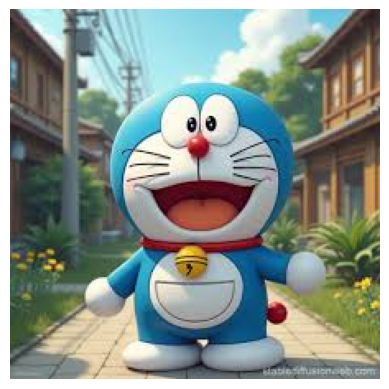

In [29]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUTEhMWFhUXFRcXFxgXGBUVFxUWFRUXFxUYFRcYHSggGBslHRUVITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OGxAQGzAlICYtLS0tMi0tLy8tLS0tLS0tLS0vLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQMGAAIHAQj/xABFEAACAAQDBAcEBwUGBwEAAAABAgADBBEFEiExQVFhBhMiMnGBkUJyobEUI1KCksHRBzNisvAVU2OiwuEWJENzk9Li8f/EABoBAAIDAQEAAAAAAAAAAAAAAAMEAQIFAAb/xAAvEQACAgEEAQMDAwMFAQAAAAAAAQIRAwQSITFRE0FhBRQiMnGhgbHwQpHB0fEV/9oADAMBAAIRAxEAPwCsYFi7yJizZZNt4/UR27AcYl1MsPLN+I2EGPnWQ+T9ItnQ7pI1JNVwSZTHtrt0iYyrgrmwrIrXZ251B2iNWXS0b0tXLny1myjdWF9PzjHFoMnZnTg4ujkXSx1lzmlL3LkroeyTtENaSiqHlS5qVIsLAWTZy2wp6X4g0ya2aSUsTa51Nt9oY0nSkrKEvqQBYb9/GKYxvJdKg5DO66WHn9Ydcy5bWuNhMPsDfsvL+yTbwMIaWahIqDmBFrgbM2wEw7ZOqqEcdyaLHk20QVC0/AQy/V80b84mbvA8RGzJ2mH2h8YiQ9gcjaLAWTMIjIiciNCIumCZARGhETkRoVi1lWiAiNSImIjUiJsq0QFY3p5BdgvExsVhv0eAu3GIyT2xbL4se+aixjRYcksaDXeTBYUDZGk17RA1RGa90uWbSUYKkRVlRaFk17wTPBMCsINBJAZuwOt7sLckOHZdhjeomS2GVQBaGIZVHgTy6dze6xJlhdjWJpTpmOrHurvPODMbrkpkLufAbyeEcxxfEmdzNmHU91eAiM+eltiW0ejcnun0iLEa9iTMmHMx2DhCOZMZmuYmaazE33xIlP2gOIhHrs2fhA/VxkNvoUZEbjqBqmmtA1PNKniN4hxNUqcrjbs84Bm02hPOJTrhkfKLd0H6WNRuATeSx7Q+zzEdqp56TkDqbgi4Ij5glTSh5b4vvQPpcadhLmG8ljofsE/lF0wOSFoY/tDUdYf63RXFiwdOZgdyym4OoMe/8A1TqryZqhGUHtXuCRrFsb4BzQz6KEd1hdWsDfjaH+I09kKj3kPAjW0LcCwSbKlOk1lLgggrfdsh/TsJkvXwPIiDiU3zYJT1XWIszeO8OG4xJl1cce0IDlU5lTGXc2o5jfBMqaDlN9nZPhuiUUa8BKbBHhEbShpbnGxEWsE0QFY1KxORGhETZVogKxrlicrGJLuQOMWsigcrBNBOKNoL33Q5l4egFiLmN6SkVL23wvLPFpobhpZqSdmz6i8RSZVzrBTmI3mADSFkx+vIPXTVAis12LooOU3MZ0rr2VbAbd8Uqa+ZgGO06gQHJmlF7IlHyM8RxbNrfwgKmxVlBmMSqjefa5CPa2ip5C55nkua5PlFQxrFy5u2gHcQbAOcVji/Lc3bCRx32b47i7TnMxz7i8BFcmMzG5jcsXNzBkulsFJ4wfoP8I1paS8Ma2laWyaalBbzgqlo2YEgWUAnxtBnSBfrJP8A2xAHk/JIMsfFsU/R5nGMiy9SIyGvRXkU+5fgWdIyCJOljpeAklXDe8Y1xCtaYUDeybDwgqlHe94xGZ3I7AqhQjrKYWuIFluUNt0NEl9pxzHziKvpNpEVTrgKy3Yn+7le4PlHV8Dm/wDLyvcX5RyrEx2JXuj5RP0e6Uz1mLT3upcAcheLY/0oXyJuTOn1K2ObyPhC5D1c0j2X+Bh1kBGvCFtVIzLY7VhhMRlGhZiyzXz5MvY1G2+yFeGNNanDdiwPO+2HFTT51OZmVlU7DbMNx5wu6NUIVVLOSGFwCdL79I73LKtg+pzfzAMS2iGm4eUFERexeS5IrR4ViRtIk+nSVFjcnkP1jm37IhKPu6BcsEUEsFtRENRi0o7FPwj2lxyUosVbx0/WOkpuPR0J4lPmSHoEB4jikuSO2bHcOMDTukErKSpJP2bEGKP0lxcTWuVtYWtvjPzOUPbk045YS/S0yxHpdKN7i0G0+JJMTOpuI5VMlltV2byTBuC4i63TNYcNxiscrirfJRu2WrpFUI6izaxThTC7E32bbwTUVZsSNmsJp2IEggaXgFzyS3dE8ICrJRLGzX4FiTaIKjAiBmaYCeQg6XSPN1XU8N8aUsomassnfb4Q24ySuy8csm0hVQUo2njYQ7xCjAp5bW1LGDOimDibOcHXKT8I2x1bSEHCY3zMLZJ21RowilZY5OHKtA77ypirY+PrJP8A2xFnVWeiYlrKqkBRv5mK7i8vNNkj/DEUbe9N+CYJU68kX0hoyDP7OHE+kZDn3WPyKfaZPBWHXNYg31Hj5wfR+17xiKaiTGLyRk12D9N8R0tWQDmFtbX5xzTJTT6IZQ7T+I+cGzkUq3EQKiWLHjb5wxnoMt+UdZzQ2xcdmX7o+UWGTVoJMsIi5wou1he8V7GG0TQ90fKI5TNbQ7oim8api+V/kOmx+apILw7wHHQ4vMYXGniIoefXWCiyAWW4MWScOhd89nRMQRTLbXcSp/KEOFUwaSDaxGoNzx10gxqK1IodrsBcaxJ0ZoAkpZkwdphcDXYdl+UMJ8kcKH9RvIkXs2xSBr+g3xtPngbIFq8QgOkvOmrLB26k8FG0/IeJEGUHW6XQnPKnJQh2wmWk2cSJa3A0LE5VB4X3nkAbb7RFX4TUIpbKrgakISW8lKi/lryi2ypaqoVQAALADcI9cwv91JPgb/8An45RqV35OZiqvs1va1rm99lgNpPCHkjoxPZbs6SyfZILke8QQAfC/jEmGYWBiM027CKJqjcGmkgfFJp9IthMHz6tqlAV0n0yPLy880v+znOMUE6n1mAFCbB1JK3OwNfVSfTnCqbUhhZgGHA6x0+vlq6MjgFWBDA7CDtjjdaDKmzJRNyjFb8V2ofNSIY0ub1k4z7F9do/Qanj6/sSTaZPYOXkTceR3ecT09Ci2Ive2t+MK3qI8l1pGl9PlA9Xod8H6XDJ0utadZOQurkljYEBRCKrlhTYG8bVDm8D7YzMeJw4Zq2nybyKlkN1NjsgzCCTOS/H8jAOTTWDsIb61PH8ovkf4stj/Wv3H3RCaVnTcouSWA+MCY4CZKDf1jfMxP0fmdW8yZ/Ew12b40qqwWRUTOS5yk93MdTGe3yqNlLuxqtZlpjK0AIN2OgF4T1eIdtElS7zCtlZtBYbxB0jBC5vPbMfsjRR5R7ikyRJdZjt2gpVABmA8Y6H5y8kSkoLgF+hV3219IyFn/Fj/wB0vq36xkG9D5/hAvWl4KzT1QvdGseENZFeraTFCniNkVjqdp4RKlSw0Oo5w4LOmWSfTle1LNwSNNoiX6Ve6tofn4Qlo8QI7rfdMNkq5czRuy3PZEON9Hbmuyw4x7HgPlGlPUU5srkow0vuMb4uO54D5QjqcRVSVMkNbffbFVexFdqlNplomYepX6sBuYIvCWe5vY7tITzMTIHYQpzDGC6KqEyw9r+b/eLY1QLLirou3RTNMBaYSZcvQA7GY7F8BtPlxh3WV14CVBJlpKHsjtc3OrH1+AEAzp0aODAlyYOq1LbpdEs6ph50H1mTm3hUA+8XJ/kEV3DMPn1X7hRkvYznuJfPIBrMPhYc4uOAYH9DJLTWmGbYMSFVQVuVCKNgOZtpO6I1eWCg4J8hvp2myvKsslwWCOeftU6V1FKZVPS5hNnSpzqy9VcGSFYX60FcuXrCRtNlA2xf2eKd096PUdcksVGbNLY5Glmz9q2ZNhuDYbr6aWjLi1ds9AouXCBsE6STGoplZlHXf2fLnFQNC6LVNoOBKk24GKz+zHpXVTsRaXMmM8iokNUIjzevMkqwXvf9O5D9iwAzLpD3CcRk09SZbDqpfVpJVGFgqygRLDA+841+0IaYD0doKJ5kymlZHmaE5may3vlTMTlW+4cBwESpRldBMuCeKt6osNZNsI5H03cLVknQGWlydl7uLX2XsFjo9bWAgm9gNSd1oX0CZgzMO+b2I9mwC3B5AG3Mw1p5+k9xnanGs0dpy4tGhaL1jnRCW4LU4Ep9uXZLfkVHcPMeYMUKpuhKzBkZTZg1hY/Lz3xrY88ciMXLpZ435CKfKxCtv0HnDYUglqVCZjxiuJMB1BBHEaw6lV7ZM1/94yvqeJ8Tj17j2iycODBKwN7QsI9wiYBMGl29nhfnGwE2ceypb5esMKPCFkMJtTMC21CjUnxhOvwpmhiT3phWGULT7tNOgYgIui6Hfxg6vlSJWRpjBQhuFG8mElZ0mIBWmQIv2jv12xV6rEASS7GY3jpC8cHNy5+DSlkbXHBZsR6VTHushco474rc6fLQ3mNmbbYa6wvnVrsLd0cBpAvUb4Oo+3QK6G/9ty/7r5RkKuojI7ZEnfIsmHYeGXXfCaqpwGIG4wdJxR5YOgIGkKHq2LEkXuYZm1JcCkE4t2aTZBEbyZrLt1F98E0zA6EEQbKCi4I2wJyrgtKaRaKuoDqjDgPlC2YZZcgmzc9hjyibS26F+J0r9b2CWLHu20AizSiqZVSuVjX+y2YaLf0ifoxLzVEtHUEIS4PDqwWF/MCFtCJ6aXsN+t4snRxQLtvEth6uv+8WxJOSSI1MnHHJvwMsRxAAgG5Zr2AFybbTyA01NhqOIjMIpxPbPOlTzTISGCS2mGY42oeqzHIN9r3Om4iAanMzBU77sET3nYKL8rkE+EdDo8UpKeWsiUzOJYyfUyp1Qcy6NmMlG7V73vvJhzVZXjjUe3/Yx/p2njlk5yXX9wqm6QUd1lidLltYBZb/AFL2GgAlzAreVoZTpSupB1B/oEEb+cIqrpBTsp6yTUFN+ekqbeYaXFeNXhwN5UyqpT/hU9VKTzTqurbzBjLqze6LJUUVWNEaXMXcWJRwP4rAhvEWikftDappZcuazA3ew6sMAjAXF2JuSdddNkdMw8ESkDTDNOUHOyqrPfUEqoABsRuEAdIcPWokvKbYw+I1EVl+S2jGlzejkU6PnWuxeZNJLEknfvvHVOj1LMMiWetYNkGYGzC9ueo8LxXMN6IIKidmH7qaqgHYLypb+erGL1Qy8otBsWPaF+oa+OdKMfY8TDiSDMcvbUDQLfwG3zvGk7GZQYy5d5rjQrLsQp00dyQqHW9ib8AYKr6ZZstke5BtcBmQmxuBmUg2NtRsI2whp5FSAFRaamQaBUvNYDdZrKo/CYMZQwMqfM/eTRLX7EnVvBpzC5+6qkcTFd6XdHpfV9dKS0yWLsSSzTE35mYlmI2gk8Rvh0uHBh9ZOnOf+51Y9JIQHzEe/wBmSlIIzgg/3kwg8QwLEMPGJhJxlaInFTi4s5Ytrk8dvPnFg6P1chEfrgDYgrpcm97geghNiVL1U2ZK3IxA906r/lIiIC422h/U1LC6MzS/jmW79iwYj0rYDLKCyl4+1FXqcSzG+rHi36RBWUtiDqb8Ykl03KMdpI34u+gOe7tqSfDdG0qm4weZAyMfDZHiEW2AeOpiL8Fq8kCSRuBMFTKXsHyjQTRcC5Ou7QQ2nSCZZIGgtf1iknXZKp9Cz6B/FGQ3+iP9k+kZFfU+SdnwV6o2N4iIKcHcIlqH1MQdZaGV0KZX7BpFjr6xN1N9bwu+lMdI3AII10jtoDksNDE8uu6tydIhod0CYg2WYSRpE5oqUaZLHlVV51vYDebCJsCqO+vCWf5lhdR40bBQgtGtBio68qVsWuoI02i4uPECB6S4zSqjsz34ZL4LZ0RUPXyr7JaTJvmoEsfGbfyi/TMfpluomqSNqSwZrD7ksEj0jnXQd1armKwBBpnWxFwQZkrMCDtB0i3Vcx1ssqYkpQui5NCeHAAfnDGs/LLXwR9NhGOnv5YVVY8NCtLPfgWWXKA8pzq/opMRHF69u5SyUX7U2e1/wJL/ADir4t0nelu9Qpts6xRnUX02bVv4HxivYj+0yUe4Jkw+SL6nX4QDal2OxjKX6UdZGLAKvWMpewzZL5c1tct9bX4wDPxtd0cPrunVU/cyyxyGZvVtPhCafjVS/enzT4OVHothHceA60c326O00tapn1V9pmS28jIRfmhg4Vix8+tPYm5dieJY3PDW8bS6qYO7MceDMPkYspsl6BP/AFH0E1WpBGh0Oh2HTYeUVZKOlT97hwSw70tEnJ5Ze3/kjmlN0hq5fdnueTHP/NeHFP8AtAqFHblo/gWT9YneClopx6Ze5NNhzmypT5vssiK/mjAMPSN5lDTA5VUKdn1ZaXY8LyyLGK30dxadiDMGloklLBvbLMdwLaAW5X1GsXKWqooRVAUWsABbTZpFk7F2tkqZROlkjJPAuTeUpuxuTZnXUnboALnXSIMKw9518gHZtck2Ave0FdNHvUKOEpfi7woE+Yq2S9jtsbX4Q5klWBGfCG7UsOxyiyBbMG11I2A8IVK5hjLYmmBP22gjBsOluGaY2UA2jKjJW7NhxqKohpqUtTzXJ7sKqhNR4RaVlKtNPCm4vpCg0itLzE6gaR2KVyl+52SNQQvowOsT3h846DicsCSbADVfmIpFJS2dTf2h84vWK/uT4r8xC2u/VELpKcXRLGRloyM8dOVVQ1MQSyu+CqgbYBe0egiYuRBInAbrxJ9JUkADhAkncNt4lmSsswKeIi1KwFclnooX4jKzTWs1tmkH0UKsT/fMfCJn0cyWlm2NrxNOlWOddtwfMGAafU7DB5Gh8oD1ItjXI26L4jkrVO5gyfiGYfFVi8T6zNHLpoIyuveUg+huIvdDViYiuuxhfwO8eRhnK1Op/wBCmGPp3j/qv2DMRo1qJLyn2MpHhcbo4fVUjSZjynFmRip8th8CLHzjuEuZYxWen3Rg1CipkD61RZ1HtoN44sPj6QJ8j2mybJU+mc1lS2Y2UX+Q8YMTBnO1reAh5hVKoUAQ0WQITnnp0jaWO1yUxsIbMBm28v8AeCBgZ+0fhFr+iiNupEUedkrFEpFRh0xNe8OW30gPU2Ci5JAAG0k6ACLzVywAbwx6H9FQj/S5wsf+kh3H7ZHHgPPwYwzc+xfUSWKNj3oxhIpKVJZ757Tn+JtT6bPKDWaMmzbmFmM1/VSmf2ti82Oz9fKD9ukYrfcpFSxqd1lS5GvayD7vZ+d4Ml0csaNtgTBpGubaRs5njHk2YSxOu2J1M7fpp9C+muL3+Sd0tIA/xG/OGGASc0mYOcATf3A99oa9GP3czxhJe/7mrLpG9XSGVTzVO+xhbToDIbwEWHHVJR1A2qLeMJZEsiSwIsbCIwv8n+5TM1tSBJcqxXxHzi04r+5PivzEJKiUAyAbst/GLLPlyzKLTD2dNBtYg7BAtXLc4tE6SSjGVkcZBF0+x8YyEaHN78HJp2/xiKVTK+max+fhBfUNqcsRllB7S5SN4jf2tGPOd9ECU+R13i+2GEyWrOHO0CBJk3W+2PJc6KNsC22PKNoV4on1zHwiajVyb7BG1YO1xHGLqVqiY8m2HqAY3lyZhJARteRiOmmaiDJFc4PfMSopdsvvro9MsqQGBHjBmFVgkTChP1b6+4x/I/pC2a7s1ySfGJVlljdtm/fpvsN8SpxSoq25STXZdQ0TSJ5Uxz+n6SPKZky5pYY5LkhlW+gJI187Q0kdK0O2W48Mp+RgSmvZmlLQ5o9xH9fgMuaTMkkI51I9ljx5HmIUzcNqE70pjzXtg+FtfhGL0ok/xj7j/kI2bprLXYzfgmH4BYpLHCb5CQyanCqq18og6mZ/dTP/ABv+kTScLqH2SiBxeyj46/CJpfTVCO8fwt+kav0uln2n/A/6RT7fGu2F+51MlxD+GMKPA5csh5zCY41CjuKfD2j4wXPqSxitTelCblmHyA/mIgKf0qPsy/xOB8rwZOMVSF3ptRklck2y1PNG+KnX1H0mZcX6pNAePE+fy8YTYrj02auQsEU7ct7kcCTui1YbP/5eUXUZQu4Cx4Gw47THPKoK12L6nSzglv6/k1RUBzJYDLa0eTJctyEXYPS+8niYVz6ljmdUsoNiQLLBuDhCpcv2hrkNxccb74UqXYtF8k02j7IQa9o7SF9SdkM8JoXRWydWddVD3J890DUtTMmNaWJanaSVvp5wdMq7/VsoZv4FIPkVis4zjwNOTkuAibiEt7pMlsh02XzDnzEA4jKy6A3B2HwhdiNRNU2e7AbNRnA58YGkVdiNbqTv3GApuLsBKbYymNrzO08BwEe4jifZEqWATYeCD9TthJilfYkDaR8z+kZg6TX0lJfW7MdBpsBJ3RGLG3HfIhSp0hn1VT/efERkEf8AM/3kj8SR5FqfwX/H5ENXRdgzOtBGhyg2Ivs8YCanQyi5axF7Cx18+ME0iSSfrSwG635mNcQchTLluWlkjS27aYc3zb2Xzd3VceCv4Vur/wBB6bDpahJkx1ddC0tT2rHnAuLTJPWf8uGC2Gjbm3+UOsBoZZbNNmrK1BVrZr5SNIauZFZMYVMxFEklUZEyCZe2rX3coBPP6eS3bpc/8cVT/wB7CQgpw4pf5/BUaF9eJ5wwexJvofhAbIFmNlHZDEC2ywO0RMWJMPOS28CslROknmInWmPFfWBlETSpZJAUEkmwA1JJ3AQPcQMaLDwxszKPOLBS4DKk2mTSH3om48C/LlviPDsJl0w6yos03asvasvm/wBpuWwc4S4rjjzJoVTcswF/E6w9p9G5PfPrwIajV/6MffkXdJsJHWtMFwswltNgY6kW2CFlHgk2a4SVdm8BYDix3CL5Plgrly5sxChftMxAVRzJIHnFtoei30SUAvaJ1mNvLb/ujYIY1CxRXMVbL/TtVqpL8ZtJfJzaT0KZGQ1FUiS7jNtX7qsW1J2bIu5mUMtAspXsBtEmc4J36hDf1jMbDhQyOUKnUqFLWOmhYHLztrFQxPEJ6zpK55zy3JVj181WDakWs4BAALHTYp4iPJfUse/NsulVqn/2emw58k4bpOzbpJT084dhxLm7r5pZPIhrEiAZXQWpIv16+jn84YVcpmGUTXN9Msy01TfiHF7eBEXOgWygcoa+lRUoNdpdWRqdVlxUoujkWJdH58lss02vsIF1b3W/I2PKA/7O4sflHbK6jSahlzFzKdo+RB3EcY5hjOHNTzWltqNqt9pTsPjtB5iPRaeGGXDirMPVazVrn1HX+39hIlCnD11hjRTZkruMQDtG4+UBVD5decSyamHdkK2tKjNlkyP8rdhUyYzKUuQCc1t14cdG8Imzb2KhRoWNz5KITCoFo6V0dkiXJlrvygn3m1b4kwjqdPiivxQ1pcuWbe7pGU/RsKpyzTc8VBHzgavqPo/ZdOyw7yg9o79RqPCLJ1wtC7Eu2jKDYkGx4HcYz8mCMla7HozaKZiYpWQmUxRxrYkkHiNdkV2tmAd1swIvfYfAjcRDWowwKonTCzDawvZieAMAzsSp/ZpBbm7XhVR+Akk/dBeHYZJ6sVVbMKoTZEXvPb8oKx2oSbLkLQhurJYNLta5W3e5bYrOKzAwllbhLGyk5suuseCvZVyqxVeWh2cYlY3w/wCPYr8Dr6LU/wB0nov6x7CL6dzMZFvTl4RPIwKC4Hxjwyzttpf4xJIYZhqL6ADjBVbKaWihrEFr3BuL3vYxdyimk3ywKi2rBpMq+hNhzBOzdpBE4kywuXNt3bNdt+O6BJVRY336/HbDCViVlAA2RzUfdnIXimb7J9I2FO32T6Q2l4jfQL4w/wCiExZ1XKRhoCWI45BcD1tHfh5LKNk3R39m0yagmVDmUGFwgF3sdma+i+GvlBOKYNKwwgyyzF1Nne11t3gtgANCNdsdDqK9VGpindLpiVUoyj4q29WGwj5eBMF09KabXBGow7sbinTOZYxi5ckA6QB0dGeqB3IrN590fM+kDYlSzJbZHU3vYW1DcMp3+G2LFhHR6dSDPPGV5yghPaRVJtm4E32brRterFtK+zHlgePFJ1/j4Lj0Rkh6yXfYivM8wAi/GZfyi4DpAhF+pqMp2ESXYEcQVvpFM6C1A+lHnJcf55Z/KLfhs60sLvUsn4WK/kIytdzl5+DT+lxS06ryxPi9bTm5Gdb7Q0qao+KxS62nkl86uLgFQSG0BNyALaXsPQR1F6k8T6wlrU1uNhhV44ZFU0P73DmJT6DqVN2e591j8hD2VikvcHPhLmH/AEwVmjC8HhCMFUeEBnNzdshbEtLiTOP3Mv8AMRFe6cSg8mXNA1Vh+GYNnqFh/VzcqMeCk/CEPTB8tKqHaWRfwgn/AEwxhb9RAM0V6b/YoFUlwREmD4BUTpRmSijZWKlScraAEEXFiDfjujJkXX9lsoOaiWeCMOViwPzEM6ycoQ3w7Qpo1Gctkvco1RST5d+slOOdiR6jSOoUVUMotwg/EMLYHQW57j+kIp8soTbzH6RkvXubSyKvn2NKGmWO6HBqoHm1MLusaMmLcWMUy6mMVwy+yhfXOWUqzoBwC6fOKzVrkvlZWBOulrGLlIwlJhtoBa5JNgAIinYRKNxZbcdxPKEMeoSdFtrqyt4X0UqagoVXLLe5DsRYAC+o26nSCeknRhad0SWzTFYZiSBs2WFhqbhvhFjkssrI6ZiUBFicw7QIIVTpACTwzEk7ye1tIN7C3LUREM2eWTdf4pdV/ctJ40qS5Kp1n+D8I8i9/QG+wPVP1jIL90vH8lNj8FJupOlxyOuu6x4RvMckAEt5nTygdOMTIht/W0w02hdHiiDKZAdsEChGUcxry1vEcugmWL2sg2tugW7fwi21obUUkHQLqRDDDJDpPUyQXZb5iO6oIsRfeY1wiknTlyrZJe8k2Z/A7QIvGG06ylCrLCjkRFVH03b5YzCFiJ692PaJvw4RFNmQ8qqRJrXtl4kEa+PGPKfBkOpLW4aCGFnpE+khJ0fw8zKlZhHZl9r71rKPHf5R7+0I2eUf4GHow/WLhJlpLXKoCgeHqYqnT6VmkpM4OR4Bh/8AME02W9RFv/OBfW4k9PJf52U3DMX6iekzcp15qdG+BPmBF+fEwD1ikGW9iSNgYgAN7pFvAjnHIpw7RhzgOONI7DgtK9Sl9thvXl/+Ro6nFv8AyXZn6LJ6a2vo6M1cYieoJhPSzQy5pDqyfZJNhyDC5XwIPlEv0lhtlP8AdyMPKxv8IR6NOrDzMjUvABqm3SpnnlX+ZhGju51Zgi78pu1ubEWXyv4iJsjaTzpmdso7qkF/EaqvjexPIc4qHTLEg8wS1Oku+b3z+g+ZifGOkqIvV09r7Mw7q325b95ufzip3vDumxO9zEtVlVbEb3h30V6QpRTHd/al5RoTrmU7BvsDt0hEIkOBz6hHeQhfqcpdV1az5gCq+1bKb79YvrKeJ2V+m19zG+i7SP2ikzbTEz05NibWdQd+mhtwi24jQG31aZlOu7QHeDHGcEwWpqXEpJbgE2ZmBVEG8sTs8NsfQkmWFRVFrKoUa8BaPPzjFcI9PrVjtONf0KFUU5U3vfjoYGWbfSLviGHo+osrcR+Y3xXa+nQGxWzAd4bG8uMLSxeDOcPAtUi/ziNW1ym1hs4nlGtXmS+ZSviLRqDe3G49NkCSa7BMNopUxldZahj7RI7uulidkQYdOp1LmeMzjuLqey1rnQbQecRdZMAZQxyt3gN9hprtiJwSDc21CnWxf+rx23dabpPx2TuSp+PPQ062n+x/mH6RkV36I/2BGQX7deSnqvwIAIJpKjKQLX1iCXIdtQLDib25wVSZs2WXZm47hGh6W5cg0iwoyrl6xQcwuFBU5rcbGH+D4OZhE2csu3sSwbKo5gbTAvRnBZiHNMlqxJvdr38toEXHIqjuL8IA47HURyC4MBQbl9RETVGa4UADebiIv3h7oC+UFUtODrlsAezz/iMR0XN5EnYSLAagfmYKBPD4x4AP6JjSc1hptOg1O3+tYqSazJhLhbXA1bZ5D+uEAdL5WelfTYVPobfnDOgp2AC3zNvbid5MMp+Fy3QpMuwYWOpX0tqINhtTUvDBZlug4+UfPNdIsbwE8wiOzYr+zaS9+rnTE5NldfkG+Jij4j0DmISOuW44oR8QxjejqMU/cw1ps0OymJXlTcEo3FSVPqIYSuk1QNk3N7wU/G0T1fQ+cPbQ/ihLVdGJq+0PIGKzcH8jGOM170M5nSioPtgeCr+d4V1WJvN77s/InT02RZuiGIU0lGk1NFJnuqky2MtC7NfQOxB0127rb4X0vRN2JOdVuSbBDYXN7DtbBA8c47n+NBMmOVfqsUS1vE4SLRT9Cn3zh/4//uGMnoOntTZh90IvzBhlZoISlhyMopWL/wDsnrJamoVmUE9Va5AvbrL7fEQTJ6IUy7ULe8zH4bPhDBKBEFlUKOAAA9BANROOWDgH0+N45qTLg+o1W48REKzWBsR4G+3l4wjwqqKMEJupNgLnsk7LQ9dAdo+JjDyY3CVM2ITUlZtnP2fjA1XJzggoD5iJQxGht4/rG1jxHof1gZcrs6gdAboJiknTQn1tshBXy0QnL42Fzb4R0AoeI9P94VV2D3uyNkbiBt8dYrKKkuSso2UQzGOoGltv9ecYykk3Omvy/wBjDjEaYsxUkK249o5jyhXV08ySDnU242O4EwFwa6AyjQJnb7C+p/WPYzrG4RkTyDoVSFadoOxL4cfOG9HRKgsCYnk0iW9kRKKZeK+tvlG0VJZE917rsPOJpuKTLXaYbDw/SA2kqNwPxiCUFZswGi7CB3jvPhFXFMlSY+osVNvrQxvuDZQBuBAGsPaXHJTGxzKeZJEU8NyMMcNoncg5TaBTxwqwkJysugsRcE+pgSmGZy47ouqdom+vaOvMWHhzjQvslKGBI1Nj2V3m+47hz8InkyFQBVDADYLt+sJjQVKrhK1bYdONolPSGXxhXVSA6le2Li1xm05iKhOwfEpZ+rnJOXd1iFX9VsINia6ZScfcvU/pENwhLXV+c3MVJ5uJgkfRlNgLkFt99wB4QBUV1aO9LVfHOPmsNwr2F5x8llqpywkr5yWMKJs6pb2lHgCfzhfMo5jkh5jHQGw7O2/Dwg24FtRPhddKNSVJFyunkdf65RdqR1jnowJRsFjxFwQeN4YU71KaB8w/iGvqLR1ktJnRJU9RE4q1jn64rUj2FP3iP9MYMZqCSBLFxba/H7vKI3EbC+PWiA59eOMU18RqjsVB95j/AKRBEunZ0HWTsrEEEL2bHONQbE92/rv3duO2IZVfSBZTKe8QQcoOuhhtK6bX/wCmfxj/ANYrMrBqZb9ok66lizElRodNbHNrfcInlUlPLawYlTYLck5fAZddNeUDnCMuy8ZOPRZv+LFYWMtrH+Jf/WMp+k0pAAUmEbiWuRyJvr4wimpJa1uzYa6troRw23C+pjJlNINxmYjXe2yy8jffpv5QP0IFvVkWlekkj7Mwf170S/27THazj8f5GKesmSDoz2GliWa+p1GnADTnBKJIK6MdQDtIIO+2m3b2eUR6ESfVkPapqSbsma7rs4+cCM7JcOxmSrW0YGw58YVypEqwzMb7+2Rrm902Ftb74jnyZNjlLX5sddm63M/hiv269mT6vlDHq6T+P4/rGQg6gcTGRX7Yj1F4J43EZGQ0BNZ3dbwPyjan7q+6PlGRkcSTytoi8YZ3BGRkLaj2D4ezeR+8mfc+RgiPYyFWMGRqYyMjjgam70z3h/IsbVPdMexkSuyCjY7+cIE/eN7q/NoyMjQx/pE59kpjyMjIuVMiNe/9384yMjjiaNoyMjiD0RHUez74jIyOJCY2EZGRxB7Gkva3j+Qj2MiCTcxqYyMjjjIyMjIkg//Z

"""  # long base64 string

img_data2 = base64.b64decode(base64_image)
img2 = Image.open(io.BytesIO(img_data2))

plt.imshow(img)
plt.axis("off")

In [32]:
arr1=np.array(img1)
arr2=np.array(img2)

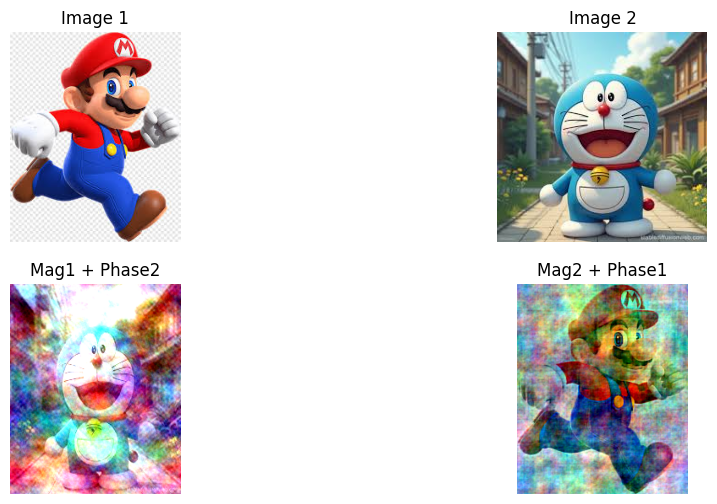

In [53]:
if arr1.shape != arr2.shape:
    print("Resizing arr2 to match arr1")
    arr2=np.array(Image.fromarray(arr2).resize((arr1.shape[1], arr1.shape[0])))

def swap(ch1, ch2):

    ch1=ch1.astype(np.float32)
    ch2=ch2.astype(np.float32)
    f1=np.fft.fft2(ch1)
    f2=np.fft.fft2(ch2)

    mag1=np.abs(f1)
    phase1=np.angle(f1)
    mag2=np.abs(f2)
    phase2=np.angle(f2)

    f1new=mag1 * np.exp(1j * phase2)
    f2new=mag2 * np.exp(1j * phase1)

    img1_new=np.fft.ifft2(f1new).real
    img2_new=np.fft.ifft2(f2new).real

    return img1_new,img2_new

img1_swapped=np.zeros_like(arr1,dtype=np.float32)
img2_swapped=np.zeros_like(arr2,dtype=np.float32)

for c in range(3):
    ch1,ch2=arr1[:,:, c],arr2[:,:, c]
    img1_swapped[:,:, c],img2_swapped[:,:, c]=swap(ch1,ch2)

img1_swapped=np.clip(img1_swapped, 0, 255).astype(np.uint8)
img2_swapped=np.clip(img2_swapped, 0, 255).astype(np.uint8)

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img1)
plt.title("Image 1")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(img2)
plt.title("Image 2")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(img1_swapped)
plt.title("Mag1 + Phase2")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(img2_swapped)
plt.title("Mag2 + Phase1")
plt.axis("off")

plt.show()



In [58]:
"""
After swapping, the resulting images retain the shapes and edges from the phase of the other image whose phase is taken. The intensity and constrast patterns come from the magnitude. This means that phase decide the structure of the image while the magnitude determines the contrast and intensity imformation.

"""

'\nAfter swapping, the resulting images retain the shapes and edges from the phase of the other image whose phase is taken. The intensity and constrast patterns come from the magnitude. This means that phase decide the structure of the image while the magnitude determines the contrast and intensity imformation.\n\n'